In [1]:
#Output folder
output_folder_address = r"Figures\\"

In [2]:
import math
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy
import scipy.integrate as integrate
from sympy import symbols, solve, diff

pi=math.pi

In [3]:
mpl.rcParams.update(mpl.rcParamsDefault)

figsize = (7,4);

# Fonts
plt_label_size = 12; legend_font_size = plt_label_size*0.8 ;

# Line thicknesses
axes_linewidth = 3; lines_linewidth = axes_linewidth;

# Tick sizes
major_tick_size = 6; minor_tick_size = major_tick_size/2; tick_width = major_tick_size/4

global_kw_args = { 'figure.figsize' : figsize, # 'font.family' : 'cursive', # 'font.monospace' : 'Fixed',
'axes.linewidth': axes_linewidth, 'lines.linewidth': lines_linewidth, 'axes.labelsize' : plt_label_size, 'legend.fontsize': legend_font_size,  'legend.title_fontsize' : legend_font_size,
'xtick.direction':'in', 'xtick.major.size' : major_tick_size, 'xtick.major.width': tick_width, 'xtick.minor.size' : minor_tick_size, 'xtick.minor.width': tick_width, 'xtick.minor.visible': True ,
'ytick.direction':'in', 'ytick.major.size' : major_tick_size, 'ytick.major.width': tick_width, 'ytick.minor.size' : minor_tick_size, 'ytick.minor.width': tick_width, 'ytick.minor.visible': True ,

'xtick.color' : 'k', 'xtick.top':   True, 'xtick.labelsize': plt_label_size,
'ytick.color' : 'k', 'ytick.right': True, 'ytick.labelsize': plt_label_size,

'grid.color' : 'k', 'grid.alpha': 0.25, 'grid.linestyle' : "--", 'axes.grid': True,
'savefig.facecolor' :'white', 'savefig.bbox':'tight'}

plt.rcParams.update(global_kw_args)

In [4]:
N_plots= 100

# plot multiple x,y list of lists (up to N lines)
def simple_plot(x, y, 
               dx = 0, dy = 0,
               title='', 
               x_label='None', y_label='None',
               label=['1', '2', '3', '4']*N_plots, lines=['-']*N_plots,
               #ms=[10]*N_plots, # marker size
               legend_title='',
               legend_fs = 12, # font size of the legend
               lw=[3]*N_plots, figsize=(8,4), is_plotting=[1]*N_plots,
               fs = 20, # fontsize
               tls = 20, # tick label size
              ): 
    #Grids
    x_majorgrid_kwargs={'which':'major', 'axis':'x', 'lw':0.50, 'ls':'--', 'color':'0.75'}
    x_minorgrid_kwargs={'which':'minor', 'axis':'x', 'lw':0.25, 'ls':'--', 'color':'0.75'}
    y_majorgrid_kwargs={'which':'major', 'axis':'y', 'lw':0.50, 'ls':'--', 'color':'0.75'}
    y_minorgrid_kwargs={'which':'minor', 'axis':'y', 'lw':0.25, 'ls':'--', 'color':'0.75'}
    
    f, ax = plt.subplots(figsize=figsize)
    
    ax.grid(**x_majorgrid_kwargs)
    ax.grid(**x_minorgrid_kwargs)
    ax.grid(**y_majorgrid_kwargs)
    ax.grid(**y_minorgrid_kwargs)
    
    # Tick Parameters
    ax.tick_params(direction='in', labelsize=tls)
    
    # Add the plots
    for i in range(len(y)):
        if is_plotting[i]:
            #line_kwargs = {'label' : label[i], 'lw' : lw[i], 'ms' : ms[i]}
            line_kwargs = {'label' : label[i], 'lw' : lw[i]}
            ax.plot(x[i], y[i], lines[i], **line_kwargs)
    
    # overwrite the algorithmic x,y ranges
    if dx != 0:
        
        x_ticks= np.arange ( round(min(x[0]) * (1.00/dx)) / (1.00/dx) , max(x[0]) + dx, dx)
        ax.set_xticks(x_ticks)
        
    if dy != 0:
        y_ticks= np.arange( round(min(y[0]) * (1.00/dy)) / (1.00/dy), max(y[0]) + dy, dy)
        ax.set_yticks(y_ticks)
    
        
    f.suptitle(title, fontsize = fs, y=1) # y = 0.92 adjust the title heights
    
    ax.set_xlabel(x_label, fontsize = tls)
    ax.set_ylabel(y_label, fontsize = tls)
    
    #Legend
    legend = ax.legend(loc='best', fontsize = legend_fs, title=legend_title)
    legend.get_title().set_fontsize(legend_fs)
    
    return f, ax

# Material Properties - Calculating b0 and K

In [5]:
def calculate_K(b0):
    [a1,a3,a5,a7,a9,a11,a13,a15,a16,a17,a19,a21] = [0]*12
    a0 = 1/b0
    a2 = (1/2)*b0**-4
    a4 = (5/9)*b0**-7
    a6 = (55/72)*b0**-10
    a8 = (7/6)*b0**-13
    a10 = (205/108)*b0**-16
    a12 = (17051/5292)*b0**-19
    a14 = (2864485/508032)*b0**-22
    a16 = (103863265/10287648)*b0**-25
    a18 = (27047983/1469664)*b0**-28
    a20 = (42367613873/1244805408)*b0**-31
    c=[a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15,a16,a17,a18,a19,a20,a21]

    K = sum(c)**-3
    return K

def calculate_b_from_b0(b0):
    [b1,b3,b5,b7,b9,b11,b13,b15,b16,b17,b19,b21] = [0]*12
    b2=-b0**-2
    b4=-2/3*b0**-5
    b6=-13/18*b0**-8
    b8=-17/18*b0**-11
    b10=-37/27*b0**-14
    b12=-1205/567*b0**-17
    b14=-219241/63504*b0**-20
    b16=-6634069/1143072*b0**-23
    b18=-51523763/5143824*b0**-26
    b20=-998796305/56582064*b0**-29
    b=[b0,b1,b2,b3,b4,b5,b6,b7,b8,b9,b10,b11,b12,b13,b14,b15,b16,b17,b18,b19,b20,b21]
    return b


# To calculate b  from ν (Poisson's ratio) with scipy.optimize.newton
def b0_expr_from_v(b,v):

    expr = ((1-v)*b - (3-v)*b**-2 -(5-v)*2/3*b**-5 -(7-v)*13/18*b**-8
        -(9-v)*17/18*b**-11 - (11-v)*37/27*b**-14 - (13-v)*1205/567*b**-17
        -(15-v)*219241/63504*b**-20 -(17-v)*6634069/1143072*b**-23
        -(19-v)*51523763/5143824*b**-26 -(21-v)*998796305/56582064*b**-29)
    return expr

## Graphene

In [6]:
v_graphene = 0.16 
b0_graphene = round(scipy.optimize.newton(b0_expr_from_v,1,args=(v_graphene,)),3)
K_graphene = calculate_K(b0_graphene)

Graphene = {"E_3D": 1017.9*10**9, # Young's modulus (N/m^2)
         "E_2D" : 340, # (N/m)
        "v"  : v_graphene, # Poisson's ratio
        "b0" : b0_graphene, 
        "K"  : K_graphene,
        "t": 0.335*10**-9, # thickness of the membrane (m)
        "ρ_3D": 2.27*10**3, #kg/m^3 3D mass density
            "label" : "Graphene", # label for figures etc.
            "name" : "Graphene" # name in file names etc.
       }
print(Graphene)

{'E_3D': 1017900000000.0, 'E_2D': 340, 'v': 0.16, 'b0': 1.668, 'K': 3.090754093256275, 't': 3.3500000000000003e-10, 'ρ_3D': 2270.0, 'label': 'Graphene', 'name': 'Graphene'}


## MoS2

In [7]:
v_mos2 = 0.25
b0_mos2 = round(scipy.optimize.newton(b0_expr_from_v,1,args=(v_mos2,)),3)
K_mos2 = calculate_K(b0_mos2)

MoS2 = {"E_3D": 202.4*10**9, # Young's modulus (N/m^2)
        "E_2D" : 124.5, # (N/m)
        "v"  : v_mos2, # Poisson's ratio
        "b0" : b0_mos2, 
        "K"  : K_mos2,
        "t": 0.615*10**-9, # thickness of the membrane (m)
        "ρ_3D": 5.06*10**3, #kg/m^3 3D mass density
        "label" : "MoS$_{\mathrm{2}}$", # label for figures etc.
        "name" : "MoS2" # name in file names etc.
       }
print(MoS2)

{'E_3D': 202400000000.0, 'E_2D': 124.5, 'v': 0.25, 'b0': 1.702, 'K': 3.3844099659675955, 't': 6.15e-10, 'ρ_3D': 5060.0, 'label': 'MoS$_{\\mathrm{2}}$', 'name': 'MoS2'}


## MoSe2

In [8]:
v_mose2 = 0.23
b0_mose2 = round(scipy.optimize.newton(b0_expr_from_v,1,args=(v_mose2,)),3)
K_mose2 = calculate_K(b0_mose2)

MoSe2 = {"E_3D": 160.8*10**9, # Young's modulus (N/m^2)
        "E_2D" : 103.9, # (N/m)
        "v"  : v_mose2, # Poisson's ratio
        "b0" : b0_mose2, 
        "K"  : K_mose2,
        "t": 0.646*10**-9, # thickness of the membrane (m)
        "ρ_3D": 6.90*10**3, #kg/m^3 3D mass density
        "label" : "MoSe$_{\mathrm{2}}$", # label for figures etc.
        "name" : "MoSe2" # name in file names etc.
       }
print(MoSe2)

{'E_3D': 160800000000.0, 'E_2D': 103.9, 'v': 0.23, 'b0': 1.694, 'K': 3.314307559673221, 't': 6.46e-10, 'ρ_3D': 6900.0, 'label': 'MoSe$_{\\mathrm{2}}$', 'name': 'MoSe2'}


## MoTe2

In [9]:
v_mote2 = 0.24
b0_mote2 = round(scipy.optimize.newton(b0_expr_from_v,1,args=(v_mote2,)),3)
K_mote2 = calculate_K(b0_mote2)

MoTe2 = {"E_3D": 113.8*10**9, # Young's modulus (N/m^2)
        "E_2D" : 79.4, # (N/m)
        "v"  : v_mote2, # Poisson's ratio
        "b0" : b0_mote2, 
        "K"  : K_mote2,
        "t": 0.698*10**-9, # thickness of the membrane (m)
        "ρ_3D": 7.7*10**3, #kg/m^3 3D mass density
        "label" : "MoTe$_{\mathrm{2}}$", # label for figures etc.
        "name" : "MoTe2" # name in file names etc.
       }
print(MoTe2)

{'E_3D': 113800000000.0, 'E_2D': 79.4, 'v': 0.24, 'b0': 1.698, 'K': 3.3492806424957333, 't': 6.98e-10, 'ρ_3D': 7700.0, 'label': 'MoTe$_{\\mathrm{2}}$', 'name': 'MoTe2'}


## WS2

In [10]:
v_ws2 = 0.22
b0_ws2 = round(scipy.optimize.newton(b0_expr_from_v,1,args=(v_ws2,)),3)
K_ws2 = calculate_K(b0_ws2)

WS2 = {"E_3D": 225.9*10**9, # Young's modulus (N/m^2)
        "E_2D" : 139.6, # (N/m)
        "v"  : v_ws2, # Poisson's ratio
        "b0" : b0_ws2, 
        "K"  : K_ws2,
        "t": 0.618*10**-9, # thickness of the membrane (m)
        "ρ_3D": 7.5*10**3, #kg/m^3 3D mass density
        "label" : "WS$_{\mathrm{2}}$", # label for figures etc.
        "name" : "WS2" # name in file names etc.
       }
print(WS2)

WS2_10L = {"E_3D": 225.9*10**9, # Young's modulus (N/m^2)
        "E_2D" : 10*139.6, # (N/m)
        "v"  : v_ws2, # Poisson's ratio
        "b0" : b0_ws2, 
        "K"  : K_ws2,
        "t": 10*0.618*10**-9, # thickness of the membrane (m)
        "ρ_3D": 7.5*10**3, #kg/m^3 3D mass density
        "label" : "10L WS$_{\mathrm{2}}$", # label for figures etc.
        "name" : "10L WS2" # name in file names etc.
       }
print(WS2)

{'E_3D': 225900000000.0, 'E_2D': 139.6, 'v': 0.22, 'b0': 1.69, 'K': 3.279490190185777, 't': 6.18e-10, 'ρ_3D': 7500.0, 'label': 'WS$_{\\mathrm{2}}$', 'name': 'WS2'}
{'E_3D': 225900000000.0, 'E_2D': 139.6, 'v': 0.22, 'b0': 1.69, 'K': 3.279490190185777, 't': 6.18e-10, 'ρ_3D': 7500.0, 'label': 'WS$_{\\mathrm{2}}$', 'name': 'WS2'}


## WSe2

In [11]:
v_wse2 =  0.19
b0_wse2 = round(scipy.optimize.newton(b0_expr_from_v,1,args=(v_wse2,)),3)
K_wse2 = calculate_K(b0_wse2)

WSe2 = {"E_3D": 178.7*10**9, # Young's modulus (N/m^2)
        "E_2D" : 116, # (N/m)
        "v"  : v_wse2, # Poisson's ratio
        "b0" : b0_wse2, 
        "K"  : K_wse2,
        "t": 0.649*10**-9, # thickness of the membrane (m)
        "ρ_3D": 9.32*10**3 , #kg/m^3 3D mass density
        "label" : "WSe$_{\mathrm{2}}$", # label for figures etc.
        "name" : "WSe2" # name in file names etc.
       }
print(WSe2)

{'E_3D': 178700000000.0, 'E_2D': 116, 'v': 0.19, 'b0': 1.679, 'K': 3.184540970223558, 't': 6.49e-10, 'ρ_3D': 9320.0, 'label': 'WSe$_{\\mathrm{2}}$', 'name': 'WSe2'}


## Gold

In [12]:
v_gold =  0.42
b0_gold = round(scipy.optimize.newton(b0_expr_from_v,1,args=(v_gold,)),3)
K_gold = calculate_K(b0_gold)
t_gold = 7.5*10**-9# thickness of gold membrane

Gold = {"E_3D": 77.2*10**9, # Young's modulus (N/m^2)
        "E_2D" : t_gold*77.2*10**9, # (N/m)
        "v"  : v_gold, # Poisson's ratio
        "b0" : b0_gold, 
        "K"  : K_gold,
        "t": t_gold, # thickness of the membrane (m)
        "ρ_3D": 19.32*10**3 , #kg/m^3 3D mass density
        "label" : "Gold", # label for figures etc.
        "name" : "Gold" # name in file names etc.
       }
print(Gold)

{'E_3D': 77200000000.0, 'E_2D': 579.0000000000001, 'v': 0.42, 'b0': 1.789, 'K': 4.1881201820231055, 't': 7.500000000000001e-09, 'ρ_3D': 19320.0, 'label': 'Gold', 'name': 'Gold'}


## Aluminum

In [13]:
v_aluminum =  0.36
b0_aluminum = round(scipy.optimize.newton(b0_expr_from_v,1,args=(v_aluminum,)),3)
K_aluminum = calculate_K(b0_aluminum)
t_aluminum = 1*10**-6# thickness of the aluminum membrane

Aluminum = {"E_3D": 68*10**9, # Young's modulus (N/m^2)
        "E_2D" : t_aluminum*68*10**9, # (N/m)
        "v"  : v_aluminum, # Poisson's ratio
        "b0" : b0_aluminum, 
        "K"  : K_aluminum,
        "t": t_aluminum, # thickness of the membrane (m)
        "ρ_3D": 2.7*10**3 , #kg/m^3 3D mass density
        "label" : "Aluminum", # label for figures etc.
        "name" : "Aluminum" # name in file names etc.
       }
print(Aluminum)

{'E_3D': 68000000000, 'E_2D': 68000.0, 'v': 0.36, 'b0': 1.754, 'K': 3.8555426447878607, 't': 1e-06, 'ρ_3D': 2700.0, 'label': 'Aluminum', 'name': 'Aluminum'}


# Functions

In [14]:
def calculate_frequency(material= MoS2,
                 diameter=1, # diameter of the membrane (μm)
                 thickness=0, #  (μm)
                 T = 0.015, # pre-tension (N/m)
                unit="MHz", # or kHz
                is_print=0,
                ):
    
    D = diameter*10**-6  # diameter of the membrane (m)
    
    if thickness==0: # if the user does not specify a thickness
        t = material["t"] # thickness of the membrane (m)
    else:
        t = thickness*10**-6 # convert (μm) to (m)
    

    A = 1 # clamping coefficient

    E = material["E_3D"]# Young's modulus, modulus of elasticity (N/m^2)
    ν = material["v"]# Poisson's ratio
    ρ_3D = material["ρ_3D"] #kg/m^3 3D mass density
    ρ_2D = ρ_3D*t # 2D mass density (kg/m^2)


    f_membrane = (2.4048/pi)*(T/ρ_2D)**0.5*(1/D)*10**-6 # (MHz)
    f_plate = (10.2158/pi)*((E/(3*ρ_3D*(1-ν**2)))**0.5)*(t/D**2)*10**-6 # (MHz)
    f = (f_membrane**2+f_plate**2)**0.5

    
    if unit == "MHz":
        if is_print :
            print('f=%.3f MHz, f_membrane=%.1f MHz , f_plate=%.3f MHz' %(f, f_membrane, f_plate) )
        return f, f_membrane, f_plate
            
    if unit == "kHz":
        if is_print :
            print('f=%.1f kHz, f_membrane=%.1f kHz , f_plate=%.1f kHz' %(f*1000, f_membrane*1000, f_plate*1000) )
        return f*1000, f_membrane*1000, f_plate*1000  # kHz



## Strain Functions

References:
Some Solutions for the Large Deflections of Uniformly Loaded Circular Membranes  
https://ntrs.nasa.gov/citations/19970023537  

Band Gap Engineering with Ultralarge Biaxial Strains in Suspended Monolayer MoS2  
https://pubs.acs.org/doi/10.1021/acs.nanolett.6b02615  

Ultrastrong adhesion of graphene membranes  
https://www.nature.com/articles/nnano.2011.123  

Nonlinear elastic behavior of two-dimensional molybdenum disulfide  
https://journals.aps.org/prb/abstract/10.1103/PhysRevB.87.035423

For $r=0$ (center of the membrane )  
Radial and tangential stresses are equal
$N_r = N_θ = Et\frac{b_0}{4} (\frac{Pa}{Et})^{2/3} $ [Ref. A, eq.12a]  
$N_r - νN_θ = Et ϵ_r$  (ν, Poisson's ratio)  
$N_r(1 - ν) = Et ϵ_r$   at $r=0$  
$ϵ_r = (1 - ν)\frac{N_r}{Et}$  
$h = \frac{a}{b_0}(\frac{Pa}{Et})^{1/3}$  [A, eq.12b]  


$P$: Pressure  
$a$: radius of the hole  
$Et$ : 2D Elastic modulus (Young's modulus $\times$ thickness)  
$ν$ : Possion's ratio  
$b_0$ : $ν$ dependent parameter  
$h$ = vertical deflection of the membrane



In [15]:
def calculate_radius_curvature(x, y):
    dx = np.gradient(x)
    dy_by_dx = np.gradient(y)/dx
    d2y_by_dx2 = np.gradient(dy_by_dx)/dx
    return dy_by_dx , ((1 + dy_by_dx**2)**1.5)/ abs(d2y_by_dx2)


# calculate the strain from the vertical deflection of the membrane
def strain_from_h(a = 1, #meter----  radius of the hole
                     Δh = 1, #meter---- maximum vertical  deflection of the membrane
                     material= MoS2
                ):

    v= material['v']
    K = material['K']
    b0 = material['b0']

    σ=0.25*b0*(1-v)*K**(2/3)
    
    return σ*(Δh/a)**2 # strain

#strain_from_pressure
def strain_from_pressure(P= 101325, #N/m^2, pressure difference between the environment and the space below the membrane
                             a=1*10**-6, #meter----  radius of the hole
                             material=MoS2):
        
    Δh=calculate_deflection_center(P=P, a=a, material=material)
    return strain_from_h(a=a, Δh=Δh, material=material)

# calculates the deflection only at the center of the membrane
def calculate_deflection_center(P = 101325, #N/m^2, pressure difference between the environment and the space below the membrane
                             a=1*10**-6, #m radius of the hole
                            material=MoS2
                            ):
    K = material['K']
    Et = material['E_2D']
    
    return ( (P*a**4)/(K*Et) )**(1/3) #meter


# calculates the deflection anywhere on the membrane
def calculate_deflection_r(P= 101325, #N/m^2, pressure_environment - pressure_below_membrane
                a=1*10**-6, #m radius of the hole
                r=0, #m radial distance from the center
               material=MoS2):
                            
    b0 = material['b0']
    Et = material['E_2D']  

    return integrate.quad(lambda x:P*x/(2*calculate_N_radial(P,a,x, material)), r, a)[0] #m Eq. (2) of W. B. Fichter

    h_sum = 0 # deflection
    for n in range(len(b)//2):
        h_sum +=  c[2*n] * (1-(r/a)**(2*n+2))
    return h_sum * (a) * (P*a/Et)**(1/3) # Eq. (12b) of W. B. Fichter

def calculate_N_radial(P, a, r, material=MoS2): # radial stress, aka N_r

    b0 = material['b0']
    Et = material['E_2D']  
    b_sum=0

    b = calculate_b_from_b0(b0)

    for n in range(len(b)//2):
        b_sum+=b[2*n]*(r/a)**(2*n)

    return 0.25*(Et*P**2*a**2)**(1/3)*b_sum # Eq. (12a) of W. B. Fichter

# calculates the tangential stress, aka N_θ
def calculate_N_tangential(P, a, r, material=MoS2): 
    
    b0 = material['b0']
    Et = material['E_2D']
    b_sum=0

    b = calculate_b_from_b0(b0)

    for n in range(len(b)//2):
        b_sum+=(2*n+1)*b[2*n]*(r/a)**(2*n)

    return 0.25*(Et*P**2*a**2)**(1/3)*b_sum # Eq. (12c) of W. B. Fichter

def strain_r_t(P, a, r, material=MoS2): # radial, tangential strain
    
    b0 = material['b0']
    Et = material['E_2D']
    v= material['v']

    N_radial     = calculate_N_radial(P, a, r, material)
    N_tangential = calculate_N_tangential(P, a, r, material)

    strain_r = (N_radial-v*N_tangential)/Et
    strain_t = (N_tangential-v*N_radial)/Et
    average = (strain_r + strain_t)/2

    return [strain_r, average, strain_t]

def custom_to_SI(P,a,r): #Convert to SI units

    P=P*101325 # atm to N/m^2
    a=a*10**-6 # μm to m
    r=r*10**-6 # μm to m

    return P,a,r

def SI_to_custom(P,a,r): #Convert to custom units
        #Convert to SI units
    P=P/101325 # N/m^2 to atm
    a=a*10**6 # m to μm
    r=r*10**6 # m to μm

    return P,a,r

## Plot Functions

In [16]:
def plot_strain_pressure(P_atm_max, hole_radius_list,  material=MoS2, is_save_fig=0):
    
    
    b0 = material['b0']
    Et = material['E_2D']
    v= material['v']

    r=0 # radial distance from the center

    # Pressure range
    P_atm_range=np.arange(0.001,1.001*P_atm_max,P_atm_max/1000)

    strain_r=[]; deflect_r=[]; deflect_center_r=[]; N_radial_r=[]
    diameter_labels=[];
    figures = []; figure_names = []
    
    P_SI_range, hole_radius_list_m, r = custom_to_SI(P_atm_range, np.array(hole_radius_list), r) 
    
    for (a,a_meter) in zip(hole_radius_list, hole_radius_list_m):

        strain=[]; strain_radial=[]; strain_average=[]; strain_tangential=[]

        #deflect=[calculate_deflection_r(P, a_meter, r, material)*10**9 for P in P_SI_range]
        deflect_center=[calculate_deflection_center(P, a_meter, material)*10**9 for P in P_SI_range]

        #deflect_r.append(deflect)
        deflect_center_r.append(deflect_center)


        N_radial=[calculate_N_radial(P, a_meter, r, material) for P in P_SI_range] 
        Ntangential=[calculate_N_tangential(P, a_meter, r, material) for P in P_SI_range]
        N_radial_r.append(N_radial)

        for i in P_SI_range:
            strain = strain_r_t(i, a_meter, r, material)
            strain_radial.append(100*strain[0])
            strain_average.append(100*strain[1])
            strain_tangential.append(100*strain[2])
            
        strain_r.append(strain_radial)

        diameter = 2*a
        diameter_labels.append('{:2.0f}'.format(diameter))

    l_t = material["label"] + "\ndiameter (μm)" 
    x_l = 'Pressure (atm)' # x_label


    simple_plot_kwargs= {'legend_fs' : legend_font_size, 'fs' : plt_label_size, 'tls' : plt_label_size, 
             'figsize': figsize, 'legend_title' : l_t  }

    simple_plot(deflect_center_r, strain_r, x_label= 'Max deflection (nm)', label=diameter_labels, y_label='Max strain (%)', 
                **simple_plot_kwargs)
    
    simple_plot_kwargs.update({"x_label": x_l, 'label': diameter_labels }) 
    
    f, ax = simple_plot([P_atm_range]*6, deflect_center_r, y_label='Max deflection (nm)', **simple_plot_kwargs)
    figures.append(f)
    figure_names.append(material["name"] + "_Deflection_Pressure")
    
    f, ax = simple_plot([P_atm_range]*6, N_radial_r,  y_label='Max stress (N/m)', **simple_plot_kwargs)
    figures.append(f)
    figure_names.append(material["name"] + "_Stress_Pressure")
    
    f, ax = simple_plot([P_atm_range]*6, strain_r, y_label = 'Max strain (%)', **simple_plot_kwargs)
    figures.append(f)
    figure_names.append(material["name"] + "_Strain_Pressure")
    
    if is_save_fig:
        for figure,figure_name in zip(figures, figure_names):
            figure.savefig(output_folder_address + figure_name +".svg")

    plt.show()

def plot_strain_deflection_pressure(radius_list = [2,4], material=Graphene, is_save_fig=0):

    b0 = material['b0']
    Et = material['E_2D']
    v= material['v']

    Δh=np.arange(0, 1000, 50)*10**-9 # meters
    Δh2=Δh*10**9 # nanometers
    strain_h_list = []
    figures = []; figure_names = []
    
    l_t = material["label"] + "\ndiameter (μm)" # 'Pressure=%d atm' %P # legent title
    
    simple_plot_kwargs= {'legend_fs' : legend_font_size, 'fs' : plt_label_size, 'tls' : plt_label_size,
             'figsize': figsize, 'legend_title' : l_t  }
    
    P_SI_range = np.arange(1, 5*101325, 101325/20)
    P_atm_range = P_SI_range*(1/101325)
    strain_p_list = []
    q_list = []
    diameter_list = np.multiply(radius_list, 2)

    for a in radius_list:
        a_meter = a*10**-6
        strain_h_list.append([100*strain_from_h(a=a_meter, Δh=i, material=material) for i in Δh])
        strain_p_list.append([100*strain_from_pressure(P=i, a=a_meter, material=material) for i in P_SI_range])
        q_list.append([i*a_meter/Et for i in P_SI_range])

    f, ax = simple_plot([Δh2]*4, strain_h_list, x_label='Deflection at Center (nm)', y_label= 'Biaxial Strain (%)',
               label=diameter_list, **simple_plot_kwargs )
    figures.append(f)
    figure_names.append(material["name"] + "_Strain_Deflection")
    
    f, ax = simple_plot([P_atm_range]*4, strain_p_list, x_label='Pressure (atm)', y_label= 'Biaxial Strain (%)',
               label=diameter_list, **simple_plot_kwargs )
    figures.append(f)
    figure_names.append(material["name"] + "_Strain_Pressure")
    
    f, ax = simple_plot([P_atm_range]*4, q_list, x_label='Pressure (atm)', y_label= 'Pa/Et',
               label=diameter_list, **simple_plot_kwargs )
    figures.append(f)
    figure_names.append(material["name"] + "_Q_Pressure")

    if is_save_fig:
        for figure,figure_name in zip(figures, figure_names):
            figure.savefig(output_folder_address + figure_name +".svg")
            
    plt.show()


# Resonance Frequency Of Membranes

Related Papers:  
Mechanics of freely-suspended ultrathin layered materials
http://onlinelibrary.wiley.com/doi/10.1002/andp.201400153/epdf

A review on mechanics and mechanical properties of 2D materials—Graphene and beyond http://www.sciencedirect.com/science/article/pii/S235243161630236X

Electromechanical Resonators from Graphene Sheets
http://science.sciencemag.org/content/sci/315/5811/490.full.pdf

Electromechanical Resonators from Graphene Sheets (Supporting Online Material for) http://science.sciencemag.org/content/sci/suppl/2007/01/23/315.5811.490.DC1/Bunch_SOM.pdf

Book: Understanding Acoustics  
Chapter 6.: Membranes, Plates, and Microphones by Steven L. Garrett   
https://link.springer.com/chapter/10.1007/978-3-030-44787-8_6 

Single‐Layer MoS2 Mechanical Resonators
http://onlinelibrary.wiley.com/doi/10.1002/adma.201303569/epdf  
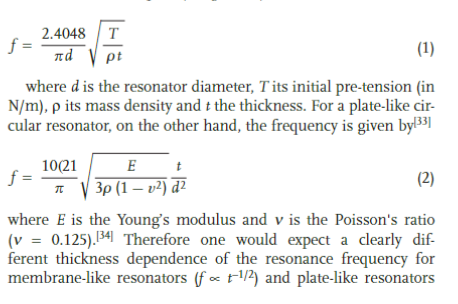  
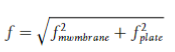  
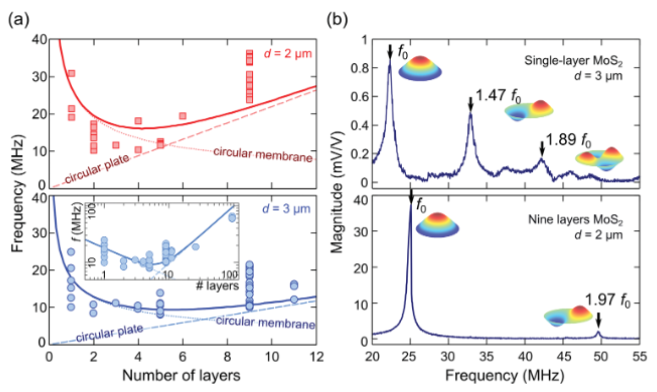

## WS2

### Diameter Dependence

f=25.194 MHz, f_membrane=25.1 MHz , f_plate=1.632 MHz
f=22.385 MHz, f_membrane=22.3 MHz , f_plate=1.289 MHz
f=20.140 MHz, f_membrane=20.1 MHz , f_plate=1.044 MHz
f=18.305 MHz, f_membrane=18.3 MHz , f_plate=0.863 MHz
f=16.777 MHz, f_membrane=16.8 MHz , f_plate=0.725 MHz
f=15.484 MHz, f_membrane=15.5 MHz , f_plate=0.618 MHz
f=14.376 MHz, f_membrane=14.4 MHz , f_plate=0.533 MHz
f=13.417 MHz, f_membrane=13.4 MHz , f_plate=0.464 MHz
f=12.577 MHz, f_membrane=12.6 MHz , f_plate=0.408 MHz
f=11.837 MHz, f_membrane=11.8 MHz , f_plate=0.361 MHz
f=11.179 MHz, f_membrane=11.2 MHz , f_plate=0.322 MHz
f=10.590 MHz, f_membrane=10.6 MHz , f_plate=0.289 MHz
f=10.060 MHz, f_membrane=10.1 MHz , f_plate=0.261 MHz
f=9.581 MHz, f_membrane=9.6 MHz , f_plate=0.237 MHz
f=9.145 MHz, f_membrane=9.1 MHz , f_plate=0.216 MHz
f=8.747 MHz, f_membrane=8.7 MHz , f_plate=0.197 MHz
f=8.382 MHz, f_membrane=8.4 MHz , f_plate=0.181 MHz
f=8.047 MHz, f_membrane=8.0 MHz , f_plate=0.167 MHz
f=7.737 MHz, f_membrane=7.7 MHz , f_pl

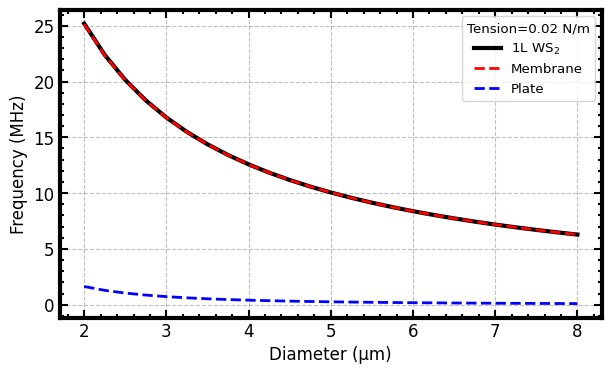

In [17]:
material = WS2
Tension = 0.02 # N/m
diameter_range_2D = np.arange(2, 8.25, 0.25)

f_WS2 = np.array([calculate_frequency(material=material, diameter=i, T=Tension, is_print=1) for i in diameter_range_2D])
f_WS2_tot, f_WS2_membrane, f_WS2_plate = f_WS2[:, 0], f_WS2[:, 1], f_WS2[:, 2]

x_label='Diameter (μm)'; y_label= 'Frequency (MHz)';
plt.plot(diameter_range_2D, f_WS2_tot, label='1L ' + material["label"], color="k")
plt.plot(diameter_range_2D, f_WS2_membrane, label='Membrane', ls="--", color="r", linewidth=2)
plt.plot(diameter_range_2D, f_WS2_plate, label='Plate', ls="--", color="b", linewidth=2)

plt.xlabel(x_label); plt.ylabel(y_label)
plt.legend(title = "Tension=%s N/m" %Tension)
plt.savefig(output_folder_address + material["name"] + "_Freq_Diameter" +".svg")
plt.show()

### Thickness Dependence

f=25.194 MHz, f_membrane=25.1 MHz , f_plate=1.632 MHz
f=18.075 MHz, f_membrane=17.8 MHz , f_plate=3.264 MHz
f=15.319 MHz, f_membrane=14.5 MHz , f_plate=4.896 MHz
f=14.164 MHz, f_membrane=12.6 MHz , f_plate=6.528 MHz
f=13.892 MHz, f_membrane=11.2 MHz , f_plate=8.159 MHz
f=14.185 MHz, f_membrane=10.3 MHz , f_plate=9.791 MHz
f=14.859 MHz, f_membrane=9.5 MHz , f_plate=11.423 MHz
f=15.794 MHz, f_membrane=8.9 MHz , f_plate=13.055 MHz
f=16.910 MHz, f_membrane=8.4 MHz , f_plate=14.687 MHz
f=18.153 MHz, f_membrane=8.0 MHz , f_plate=16.319 MHz
f=19.486 MHz, f_membrane=7.6 MHz , f_plate=17.951 MHz
f=20.884 MHz, f_membrane=7.3 MHz , f_plate=19.583 MHz
f=22.331 MHz, f_membrane=7.0 MHz , f_plate=21.215 MHz
f=23.814 MHz, f_membrane=6.7 MHz , f_plate=22.846 MHz
f=25.324 MHz, f_membrane=6.5 MHz , f_plate=24.478 MHz


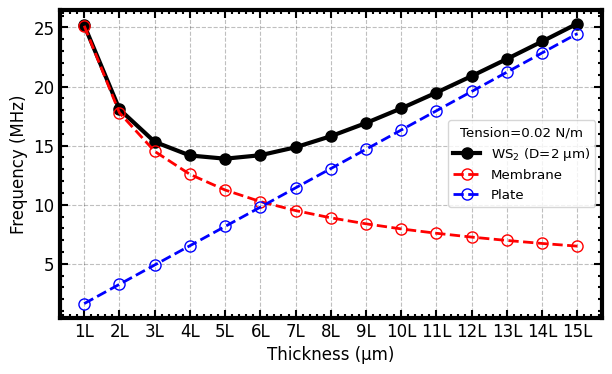

In [18]:
material = WS2
N_layer_max = 15 

thickness_range_WS2 = np.arange(material["t"]*10**6, (N_layer_max+1)*material["t"]*10**6, material["t"]*10**6) # converted to μm
layer_range = [str(i)+"L" for i in np.arange(1, N_layer_max+1, 1)]

diameter_WS2 = 2 # μm
Tension = 0.02 # N/m

f_WS2 = np.array([calculate_frequency(material=material, diameter=diameter_WS2, thickness = i, T=Tension, is_print=1) for i in thickness_range_WS2])

f_WS2_tot, f_WS2_membrane, f_WS2_plate = f_WS2[:, 0], f_WS2[:, 1], f_WS2[:, 2]

x_label='Thickness (μm)'; y_label= 'Frequency (MHz)'
plt.plot(layer_range, f_WS2_tot, label= material["label"] + ' (D=%s μm)' %diameter_WS2, marker= 'o', markersize=8, color="k")
plt.plot(layer_range, f_WS2_membrane, label= "Membrane", ls="--",  marker= 'o', markersize=8, fillstyle='none',  color="r", linewidth=2)
plt.plot(layer_range, f_WS2_plate, label= "Plate", ls="--", marker= 'o', markersize=8, fillstyle='none', color="b", linewidth=2)

plt.xlabel(x_label); plt.ylabel(y_label)
plt.legend(title = "Tension=%s N/m" %Tension)

plt.savefig(output_folder_address + material["name"] + "_Freq_Thickness" +".svg")
plt.show()

## Aluminum

### Diameter Dependence

f=33.0 kHz, f_membrane=32.9 kHz , f_plate=2.5 kHz
f=31.5 kHz, f_membrane=31.4 kHz , f_plate=2.3 kHz
f=30.0 kHz, f_membrane=29.9 kHz , f_plate=2.1 kHz
f=28.7 kHz, f_membrane=28.6 kHz , f_plate=1.9 kHz
f=27.5 kHz, f_membrane=27.5 kHz , f_plate=1.8 kHz
f=26.4 kHz, f_membrane=26.4 kHz , f_plate=1.6 kHz
f=25.4 kHz, f_membrane=25.3 kHz , f_plate=1.5 kHz
f=24.4 kHz, f_membrane=24.4 kHz , f_plate=1.4 kHz
f=23.6 kHz, f_membrane=23.5 kHz , f_plate=1.3 kHz
f=22.7 kHz, f_membrane=22.7 kHz , f_plate=1.2 kHz
f=22.0 kHz, f_membrane=22.0 kHz , f_plate=1.1 kHz
f=21.3 kHz, f_membrane=21.3 kHz , f_plate=1.1 kHz
f=20.6 kHz, f_membrane=20.6 kHz , f_plate=1.0 kHz
f=20.0 kHz, f_membrane=20.0 kHz , f_plate=0.9 kHz
f=19.4 kHz, f_membrane=19.4 kHz , f_plate=0.9 kHz
f=18.8 kHz, f_membrane=18.8 kHz , f_plate=0.8 kHz
f=18.3 kHz, f_membrane=18.3 kHz , f_plate=0.8 kHz
f=17.8 kHz, f_membrane=17.8 kHz , f_plate=0.7 kHz
f=17.4 kHz, f_membrane=17.3 kHz , f_plate=0.7 kHz
f=16.9 kHz, f_membrane=16.9 kHz , f_plate=0.7 kHz


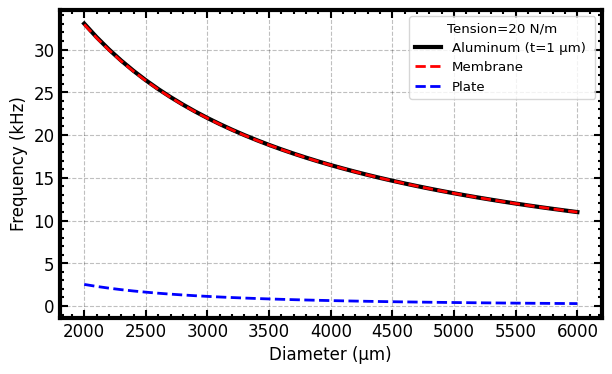

In [19]:
material = Aluminum

diameter_range_Al = np.arange(2000, 6050, 100) # μm
thickness_Al = 1 # μm
Tension = 20 # N/m

f_Al_kHz = np.array([calculate_frequency(material=material, diameter=i, thickness=thickness_Al, T=Tension, is_print=1, unit="kHz") for i in diameter_range_Al])
f_Al_tot, f_Al_membrane, f_Al_plate = f_Al_kHz[:, 0], f_Al_kHz[:, 1], f_Al_kHz[:, 2]

x_label='Diameter (μm)'; y_label= 'Frequency (kHz)';
plt.plot(diameter_range_Al, f_Al_tot, label=material["label"] +" (t=%s μm) " %thickness_Al, color="k")
plt.plot(diameter_range_Al, f_Al_membrane, label='Membrane', ls="--", color="r", linewidth=2)
plt.plot(diameter_range_Al, f_Al_plate, label='Plate', ls="--", color="b", linewidth=2)

plt.xlabel(x_label); plt.ylabel(y_label)
plt.legend(title = "Tension=%s N/m" %Tension)
plt.savefig(output_folder_address + material["name"] + "_Freq_Diameter" +".svg")
plt.show()

### Thickness Dependence

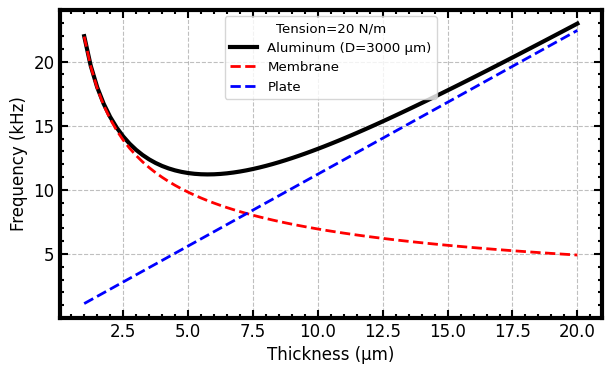

In [20]:
thickness_range_Al = np.arange(1, 20.25, 0.25) # μm
diameter_Al = 3000 # μm
Tension = 20 # N/m

f_Al_kHz = np.array([calculate_frequency(material=material, diameter=diameter_Al, thickness = i, T=Tension, is_print=0, unit="kHz") for i in thickness_range_Al])

f_Al_tot, f_Al_membrane, f_Al_plate = f_Al_kHz[:, 0], f_Al_kHz[:, 1], f_Al_kHz[:, 2]

x_label='Thickness (μm)'; y_label= 'Frequency (kHz)'
plt.plot(thickness_range_Al, f_Al_tot, label= material["label"] + ' (D=%s μm)' %diameter_Al, color="k")
plt.plot(thickness_range_Al, f_Al_membrane, label= "Membrane", ls="--" , color="r", linewidth=2)
plt.plot(thickness_range_Al, f_Al_plate, label='Plate', ls="--", color="b", linewidth=2)

plt.xlabel(x_label); plt.ylabel(y_label)
plt.legend(title = "Tension=%s N/m" %Tension)

plt.savefig(output_folder_address + material["name"] + "_Freq_Thickness" +".svg")
plt.show()

# Strain(max) - Pressure for various hole size

## Graphene

In [21]:
[1,2,4,6]*2

[1, 2, 4, 6, 1, 2, 4, 6]

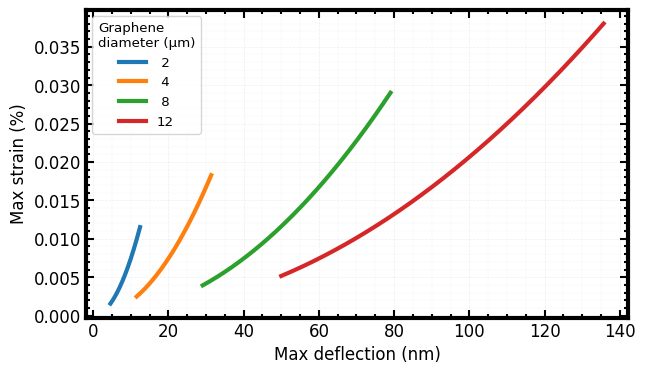

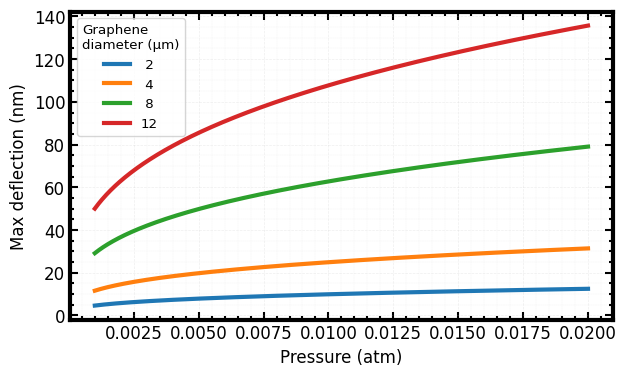

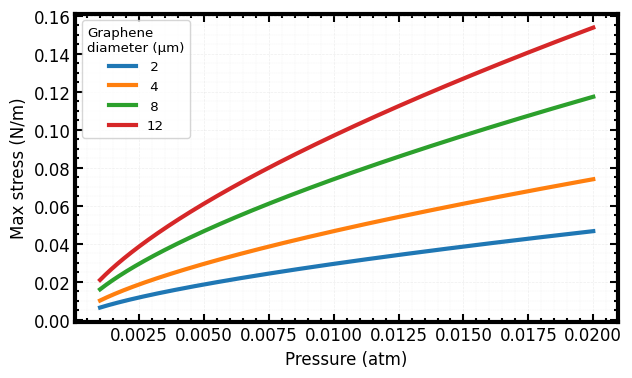

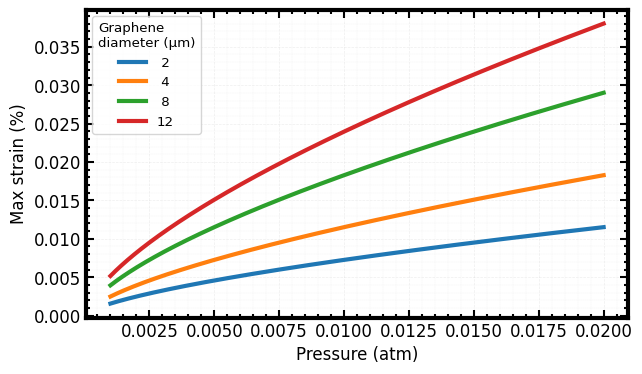

In [22]:
plot_strain_pressure(P_atm_max = 0.02, hole_radius_list = [1,2,4,6], material=Graphene) 

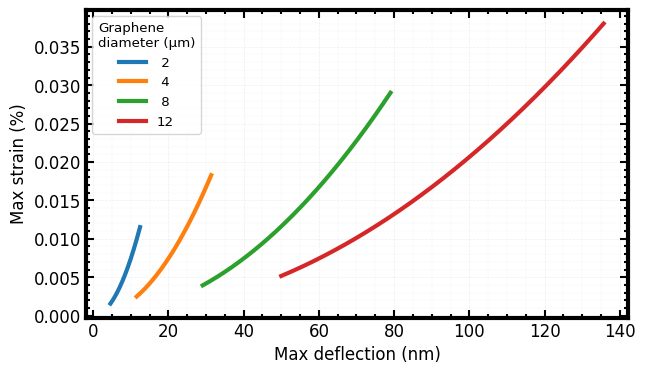

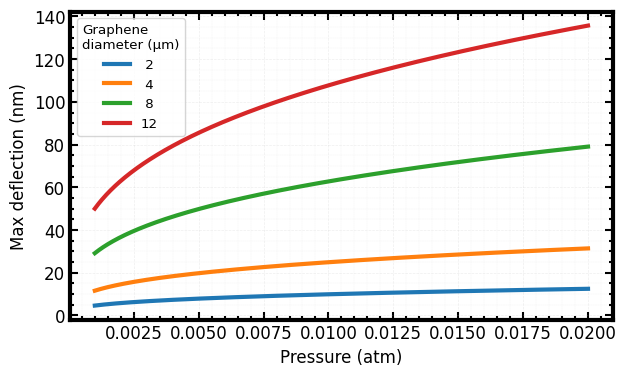

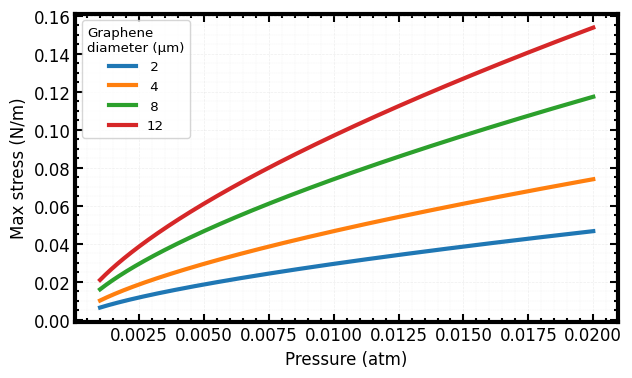

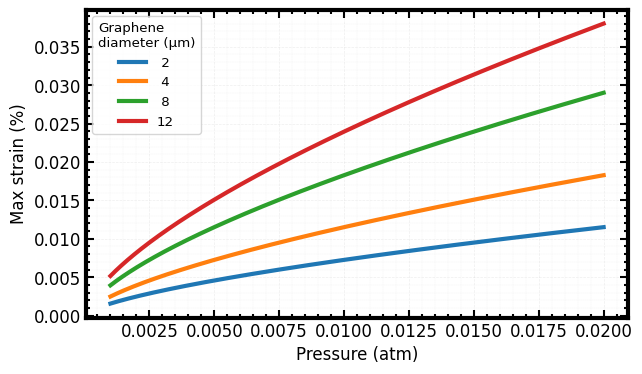

In [23]:
plot_strain_pressure(P_atm_max = 0.02, hole_radius_list = [1,2,4,6], material=Graphene, is_save_fig=1) 

## MoS2

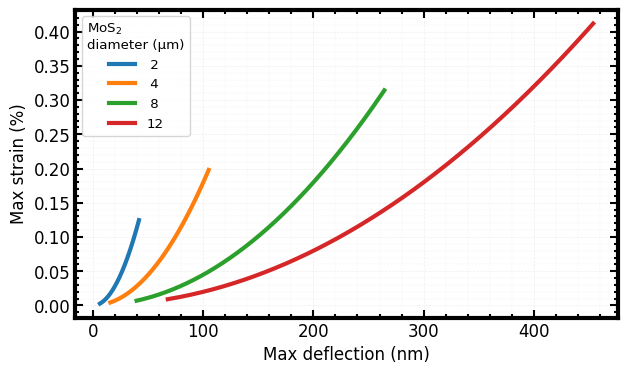

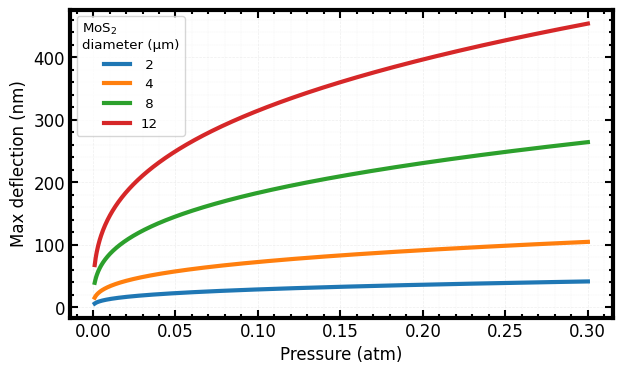

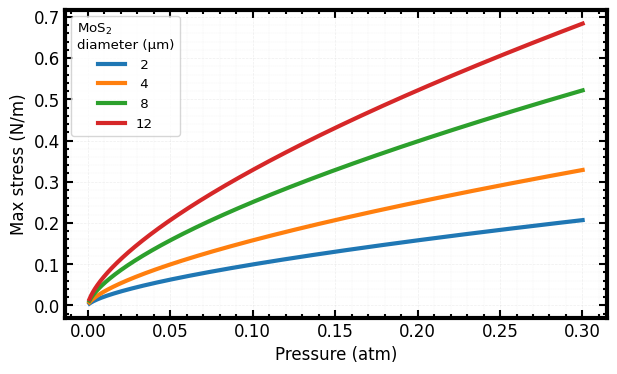

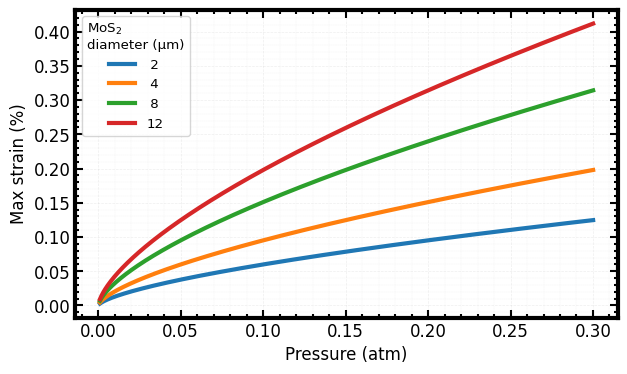

In [24]:
plot_strain_pressure(P_atm_max = 0.3, hole_radius_list = [1,2,4,6], material=MoS2) 

## WS2

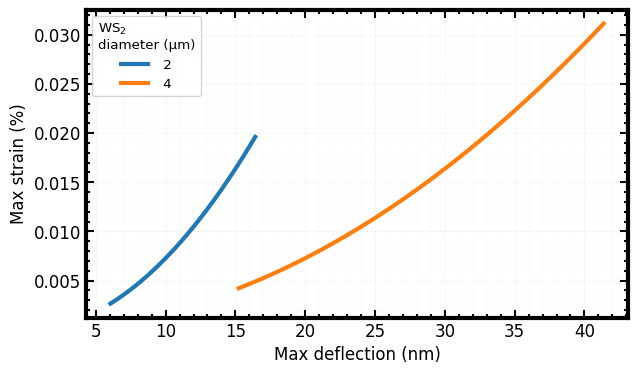

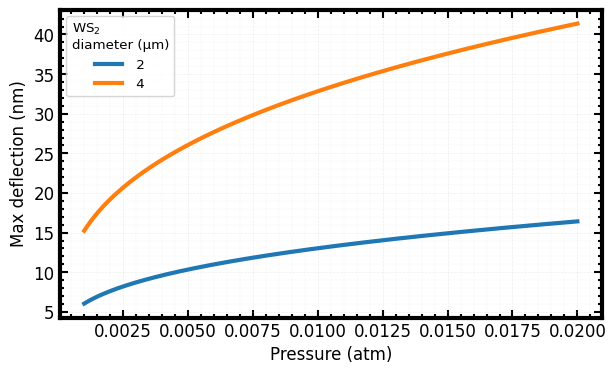

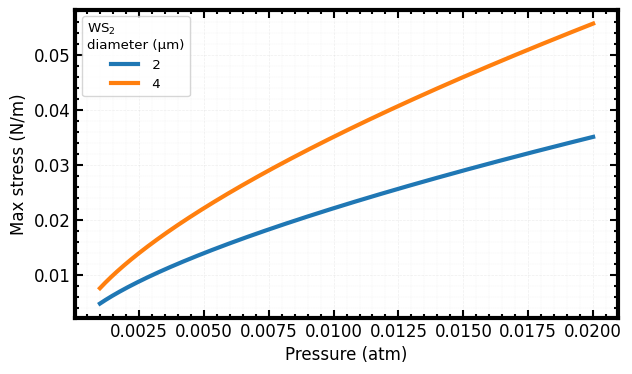

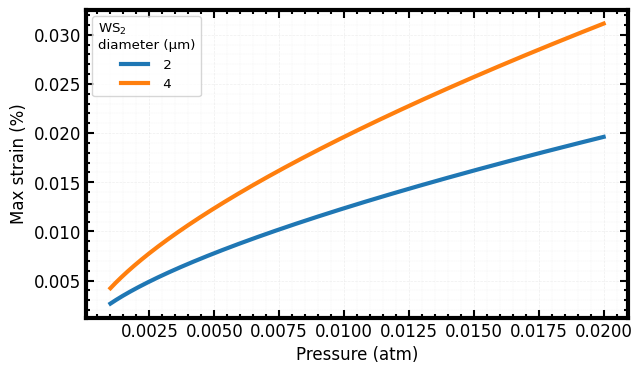

In [25]:
plot_strain_pressure(P_atm_max = 0.02, hole_radius_list = [1,2], material=WS2) 

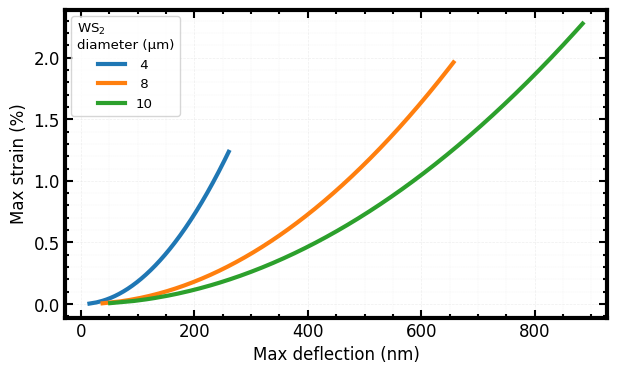

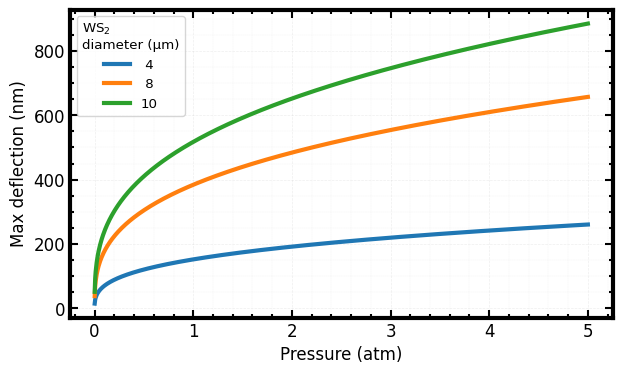

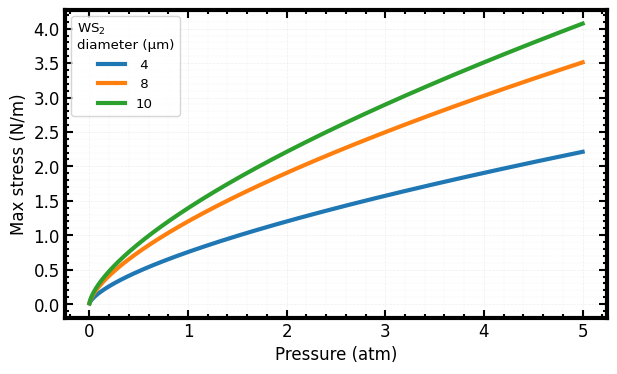

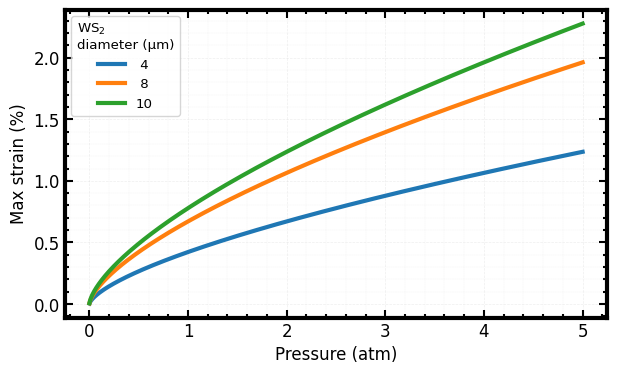

In [26]:
plot_strain_pressure(P_atm_max = 5, hole_radius_list = [2,4,5], material=WS2, is_save_fig=1) 

## 10L WS2

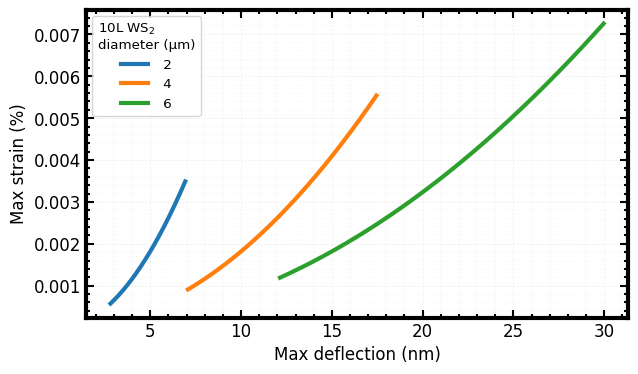

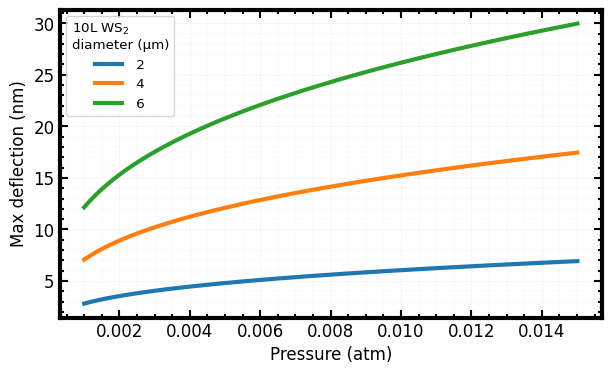

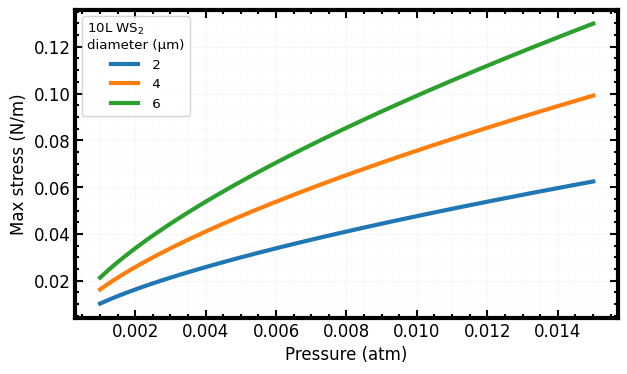

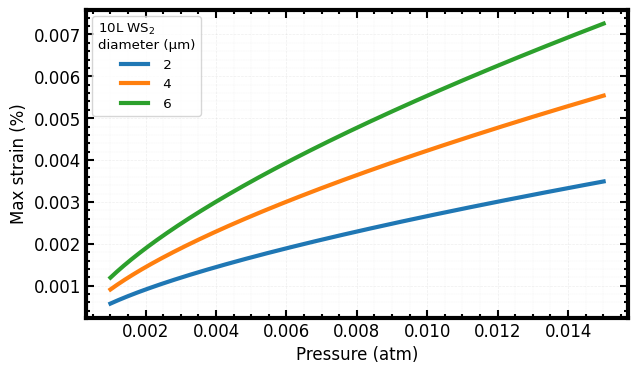

In [27]:
plot_strain_pressure(P_atm_max = 0.015, hole_radius_list = [1,2,3], material=WS2_10L) 

## Aluminum

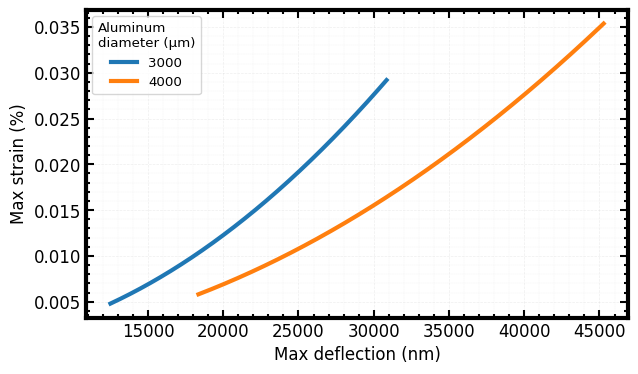

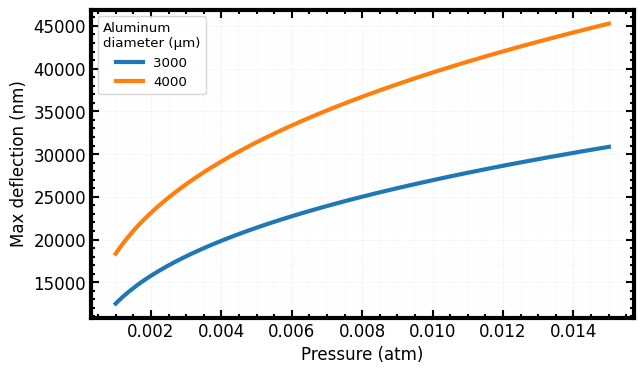

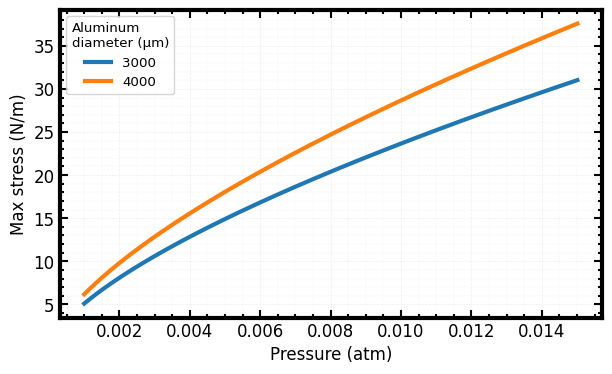

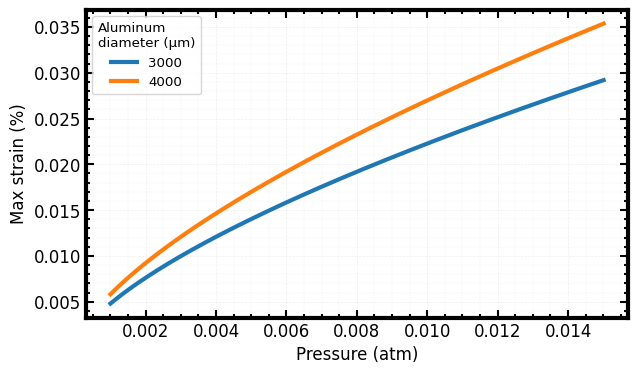

In [28]:
plot_strain_pressure(P_atm_max = 0.015, hole_radius_list = [1500, 2000], material=Aluminum)

# Strain-Deflection and Strain-Pressure

## Graphene

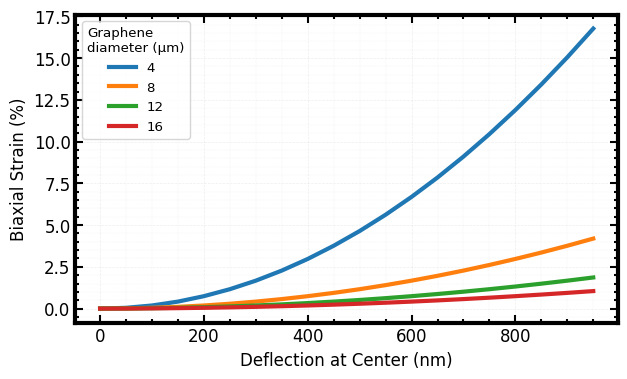

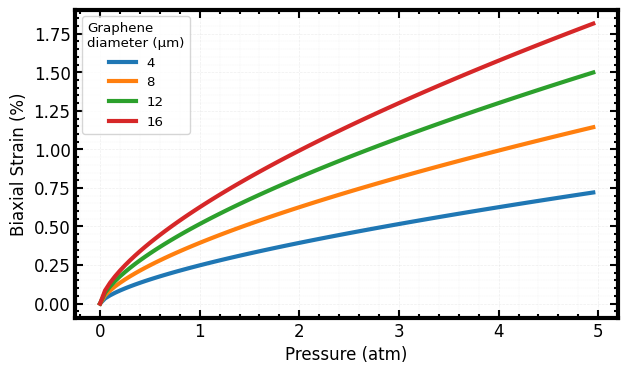

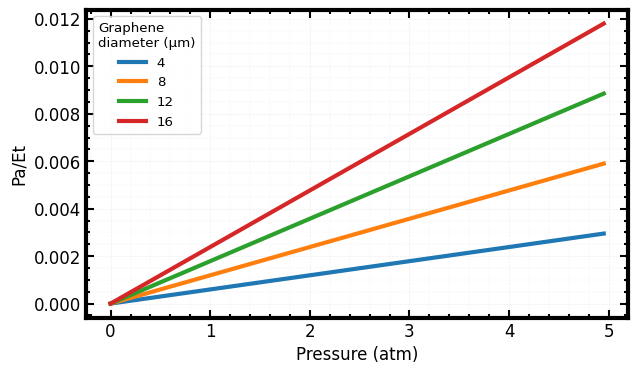

In [29]:
plot_strain_deflection_pressure(radius_list = [2, 4, 6, 8],  material=Graphene, is_save_fig=1)

## MoS2

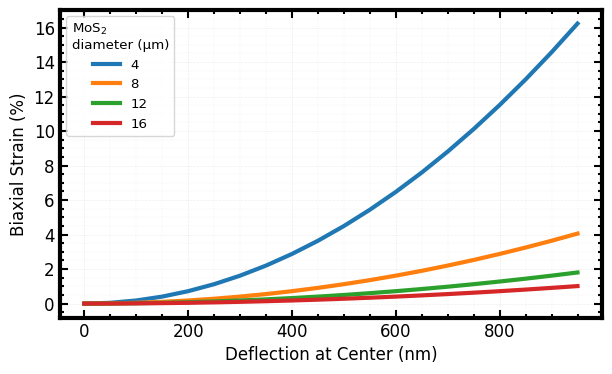

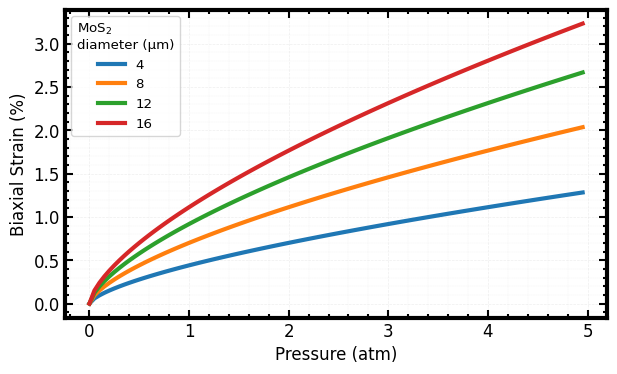

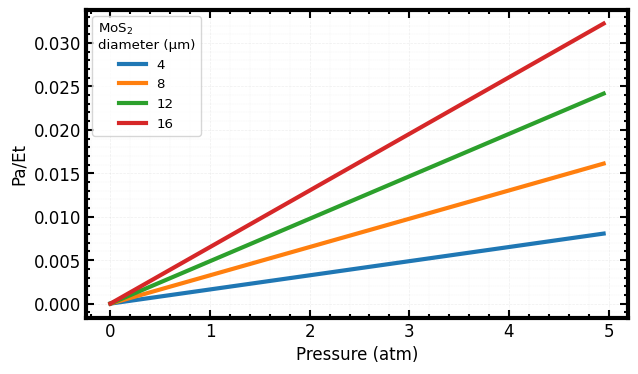

In [30]:
plot_strain_deflection_pressure(radius_list = [2, 4, 6, 8], material=MoS2)

## WS2

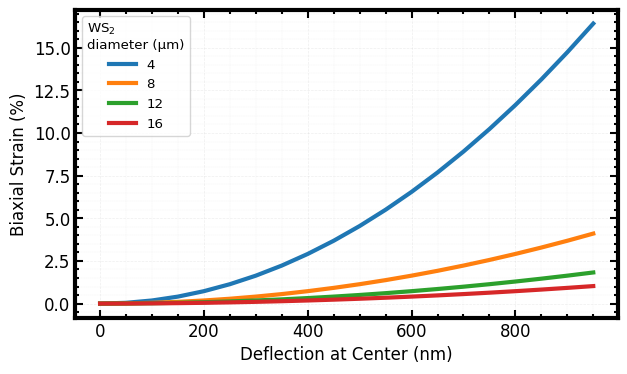

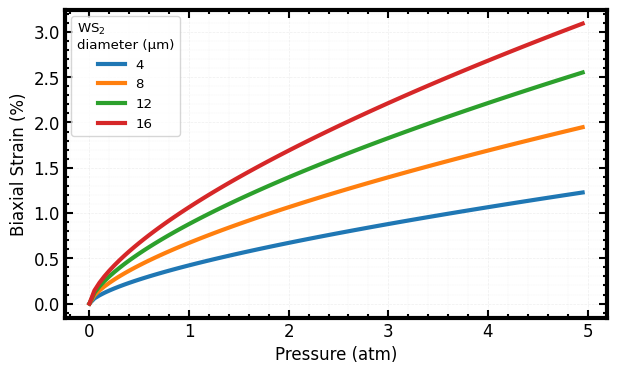

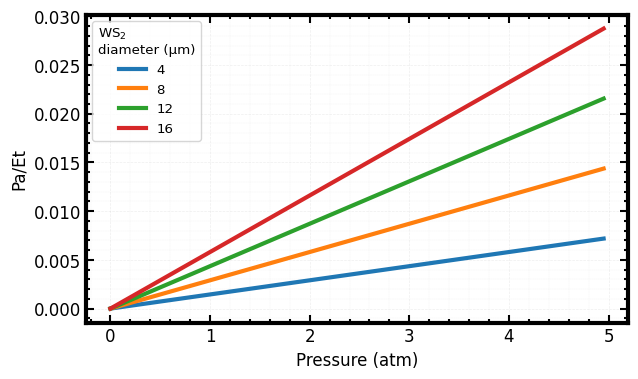

In [31]:
plot_strain_deflection_pressure(radius_list = [2, 4, 6, 8], material=WS2)

# Shape Calculations

In [32]:
a=6*10**-6 #-> meter
r=0
r_range_meter=np.arange(-a*1.02, 1.03*a, a/100)

In [33]:
def plot_strain_calc(P_atm_list = [5.1], material = MoS2, is_save_fig =0):
    
    n, n_max = 2, 200 # additional radial data points on each side, max number of radial data points
    
    a=6*10**-6 #-> meter
    r_range_meter=np.arange(-a*(1+n/n_max), (1+(n+1)/n_max)*a, a/n_max)
    
    b0 = material['b0']
    v= material['v']
    Et = material['E_2D']
    
    deflect_nm_list = []; deflect_nm_fit_list = []
    gradient_list = []
    R_curvature_list = []; R_curvature_parabola_list= []
    N_radial_list = []
    N_average_list = []
    N_tangential_list = []
    strain_radial_list = []
    strain_average_list = []
    strain_tangential_list = []
    list1_list = []
    label_list = np.array(P_atm_list, dtype = str)
    figures = []; figure_names = []

    for P_atm in P_atm_list:
        P_pascal = P_atm*101325


        deflection = np.array([calculate_deflection_r(P=P_pascal, a=a, r=i, material=material) for i in r_range_meter])
        deflect_nm_list.append( deflection[n:-n]*10**9)
              
        gradient, R_curvature = calculate_radius_curvature(r_range_meter, deflection)
        gradient_list.append(gradient[n:-n])
        
        R_curvature_micron = R_curvature * 10**6 # convert m to μm
        R_curvature_list.append(R_curvature_micron[n:-n])
        
        
        """
        """
        # fits the shape of the membrane to a polynomial and calculate the radius of curvature
        poly_order = 2
        p_membrane = np.poly1d(np.polyfit(r_range_meter, deflection, poly_order) ) 
        deflect_nm_fit_list.append( p_membrane(r_range_meter[n:-n])*10**9 )
        
        gradient_parabola, R_curvature_parabola = calculate_radius_curvature(r_range_meter, p_membrane(r_range_meter))
        
        R_curvature_parabola_micron = R_curvature_parabola * 10**6 # convert m to μm
        R_curvature_parabola_list.append(R_curvature_parabola_micron[n:-n])
        
        
       
        
        N_radial=[calculate_N_radial(P_pascal, a, r=i, material=material) for i in r_range_meter]
        N_radial_list.append(N_radial[n:-n])
        
        Ntangential=[calculate_N_tangential(P_pascal, a, r=i, material=material) for i in r_range_meter]
        N_tangential_list.append(Ntangential[n:-n])
        
        strain=[]
        strain_radial=[]
        strain_average=[]
        strain_tangential=[]

        for i in r_range_meter:
            strain = strain_r_t(P_pascal,a,i, material=material)
            strain_radial.append(100*strain[0])
            strain_average.append(100*strain[1])
            strain_tangential.append(100*strain[2])
        
        strain_radial_list.append(strain_radial[n:-n])
        strain_average_list.append(strain_average[n:-n])
        strain_tangential_list.append(strain_tangential[n:-n])
        

        P_atm = P_pascal*(1/101325)
        r_range_um = r_range_meter*10**6

        list1_list.append( deflection[n:-n]*10**9)

    
    x_l = 'Radial distance (μm)' # x_label
    l_t = material["label"] + "\npressure (atm)"
    
    label_1 = ['Deflection']
    label_3 = ['Gradient', 'Angle']
    label_4 = ['Radial stress','Tangential stress']
    label_5 = ['Radial strain','Average', 'Tangential strain']
    lines_3 = ['-','g--','-']

    
    simple_plot_kwargs= {'legend_fs' : legend_font_size, 'fs' : plt_label_size, 'tls' : plt_label_size, 'x_label' : x_l,
             'figsize': figsize, 'legend_title' : l_t, "label" : label_list  }
    
    r_range_um_plot = r_range_um[n:-n]
    simple_plot([r_range_um_plot]*5, -np.array(deflect_nm_list), y_label='Δh (nm)', **simple_plot_kwargs)
   
    
    f, ax = simple_plot([r_range_um_plot]*6, deflect_nm_list,     y_label='Deflection (nm)',     **simple_plot_kwargs)    
    figures.append(f)
    figure_names.append(material["name"] + "_Deflection_Distance")
    
    f, ax = simple_plot([r_range_um_plot]*5, R_curvature_list,          y_label='Radius of curv. (μm)', **simple_plot_kwargs)
    simple_plot([r_range_um_plot]*5, R_curvature_parabola_list, y_label='Fit Radius of curv.  (μm)', **simple_plot_kwargs)
    figures.append(f)
    figure_names.append(material["name"] + "_Radius of Curv_Distance")
    
    simple_plot([r_range_um_plot]*5, gradient_list, y_label='Gradient', **simple_plot_kwargs)
    
    f, ax = simple_plot([r_range_um_plot]*5, np.arctan(gradient_list)*180/pi, y_label='Angle (°)', **simple_plot_kwargs)
    figures.append(f)
    figure_names.append(material["name"] + "_Angle_Distance")
    
    # Plot the following for only 1 pressure value
    legend_title_pressure = material["label"] + "\npressure=%s atm" %P_atm_list[0]
    simple_plot_kwargs.update({'legend_title': legend_title_pressure})
    del simple_plot_kwargs["label"]
        
    simple_plot([r_range_um_plot]*6, [deflect_nm_list[0], deflect_nm_fit_list[0]], 
                label=["Membrane", "Parabolic Fit"], y_label='Fit Deflection (nm)', **simple_plot_kwargs)
    
    f, ax = simple_plot([r_range_um_plot]*5, [N_radial_list[0], N_tangential_list[0]], 
                        label=label_4, y_label='Stress (N/m)', **simple_plot_kwargs)    
    figures.append(f)
    figure_names.append(material["name"] + "_Stress_Distance")
         
    f, ax = simple_plot([r_range_um_plot]*5, [strain_radial_list[0], strain_average_list[0], strain_tangential_list[0]], 
                        label=label_5, y_label='Strain (%)', lines=lines_3, **simple_plot_kwargs)
    figures.append(f)
    figure_names.append(material["name"] + "_Strain_Distance")
    
    if is_save_fig:
        for figure,figure_name in zip(figures, figure_names):
            figure.savefig(output_folder_address + figure_name +".svg")

    plt.show()

## Graphene

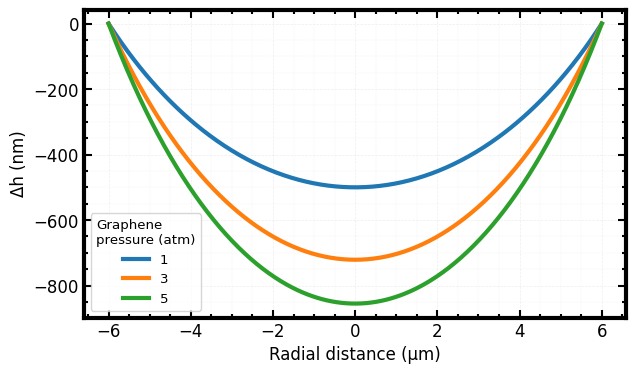

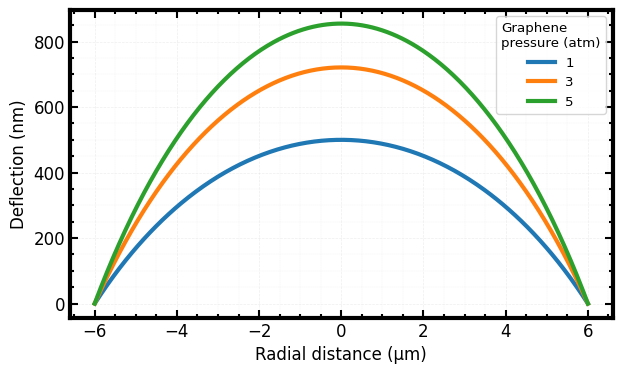

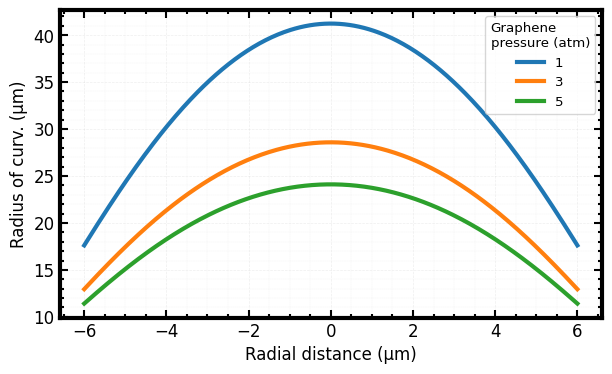

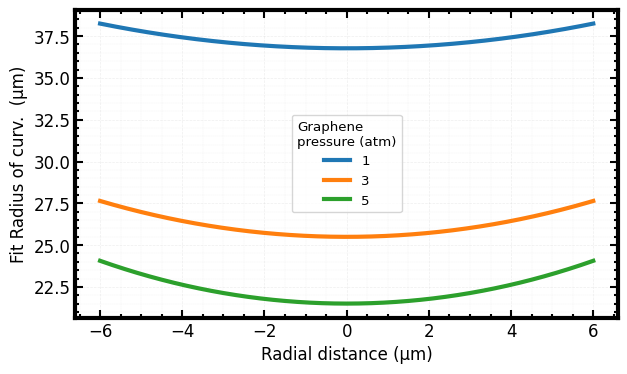

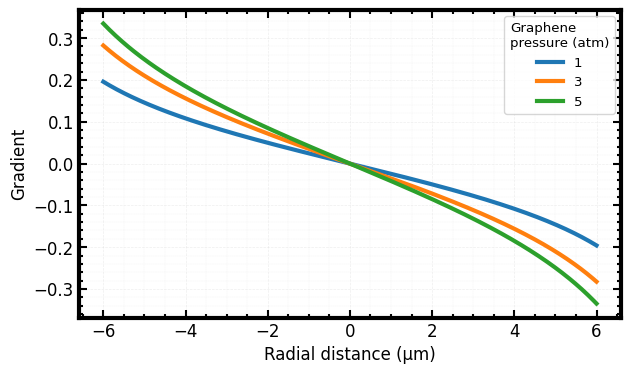

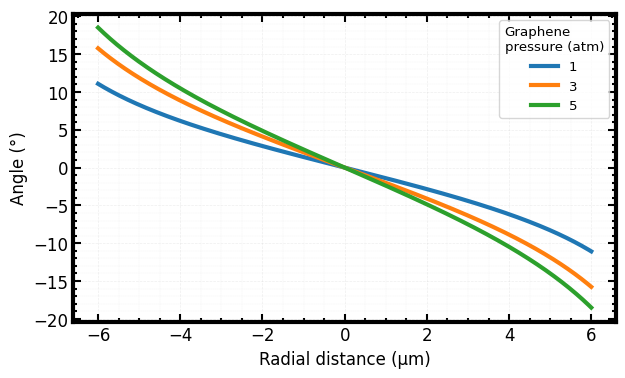

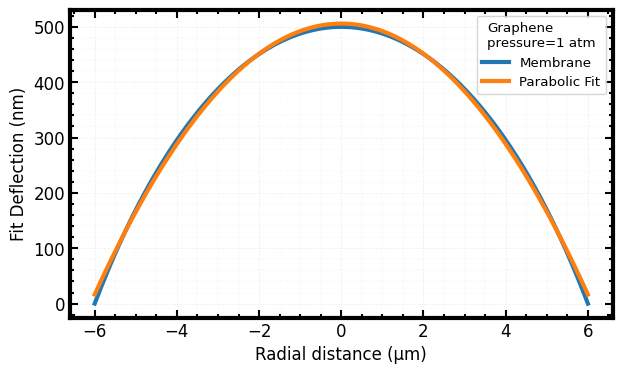

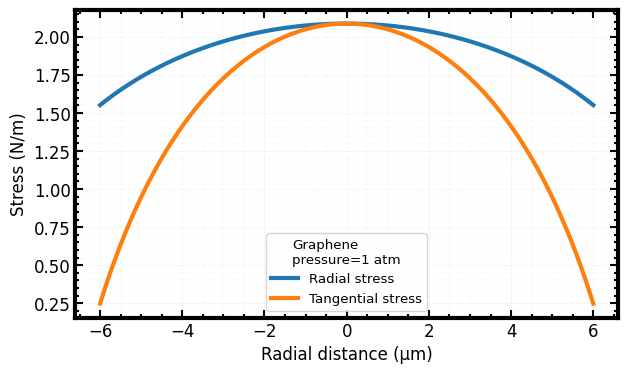

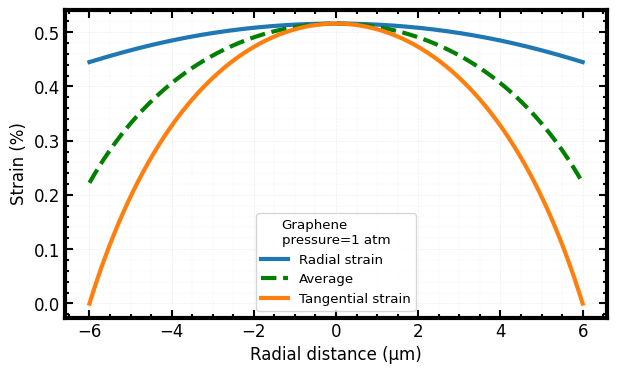

In [34]:
plot_strain_calc(P_atm_list = [1, 3, 5], material=Graphene)

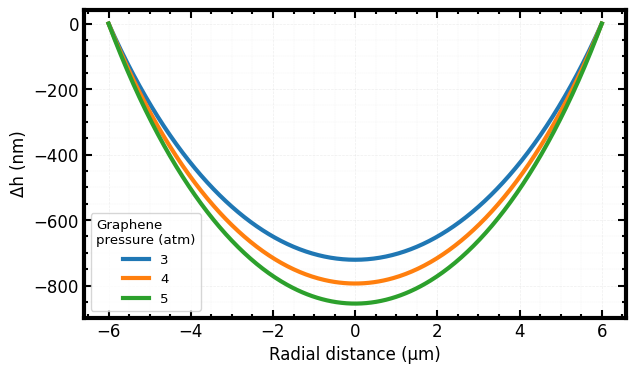

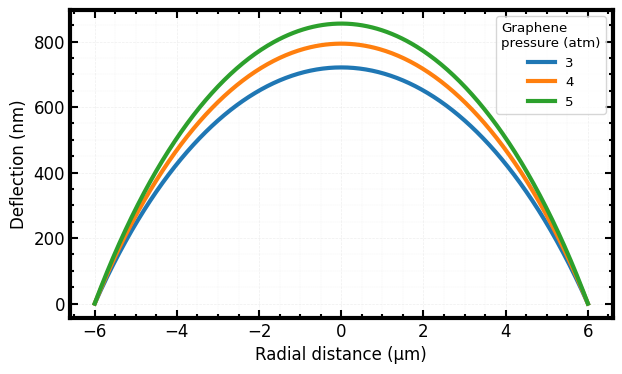

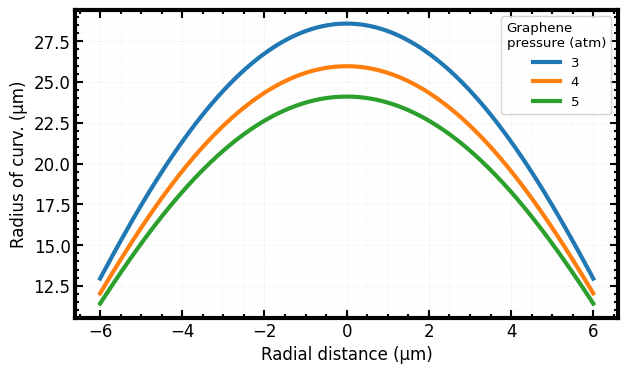

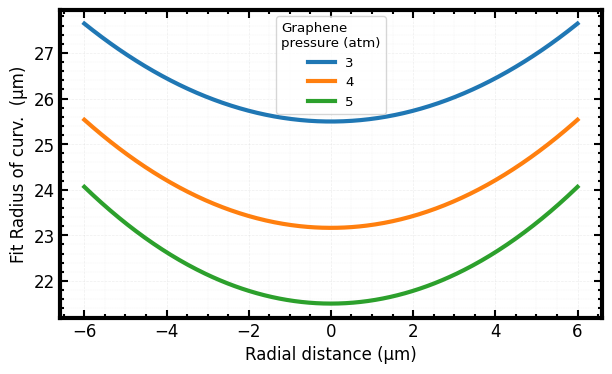

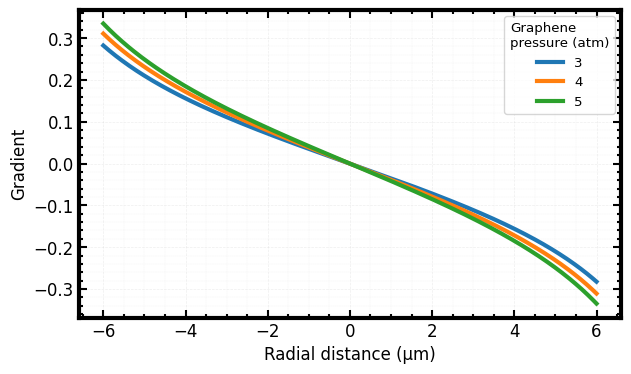

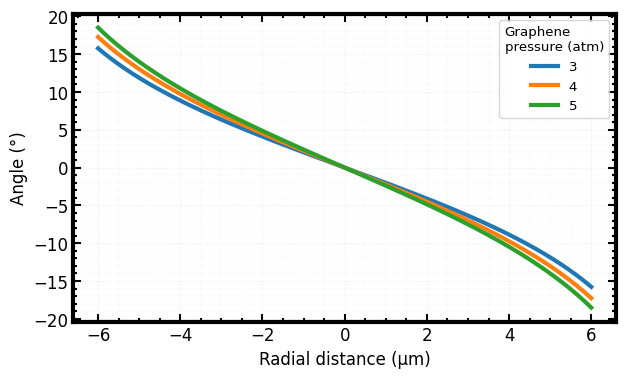

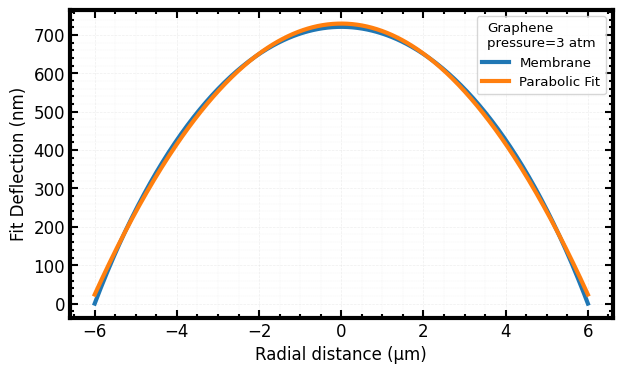

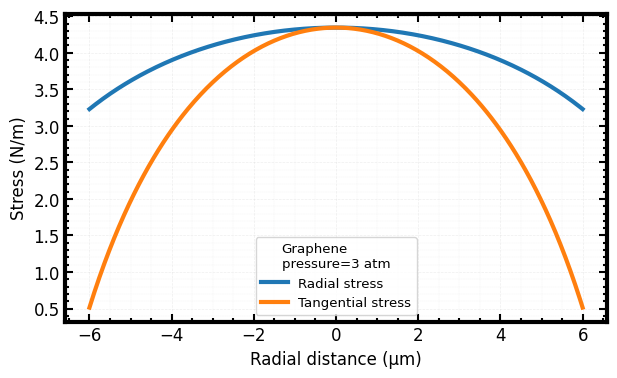

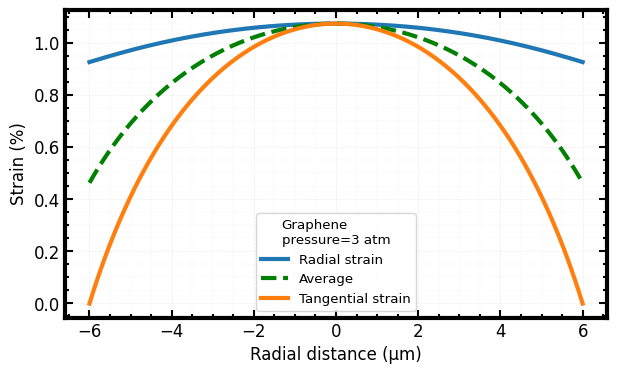

In [35]:
plot_strain_calc(P_atm_list = [3,4,5], material=Graphene)

## MoS2

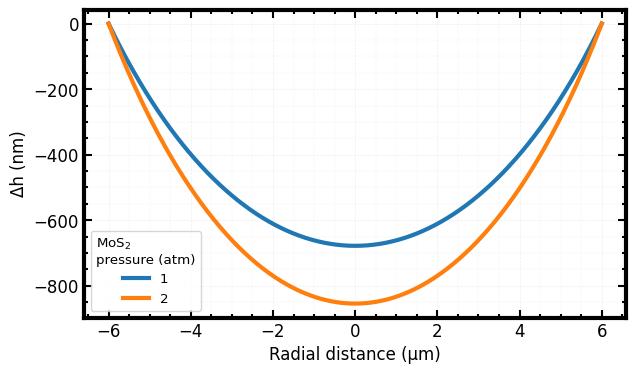

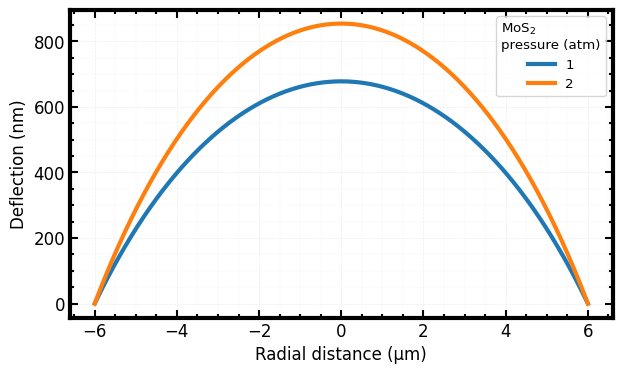

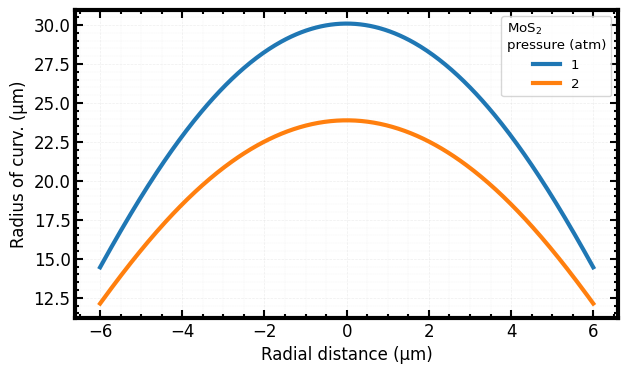

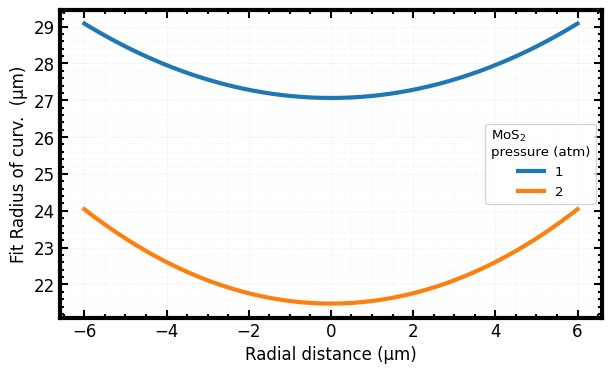

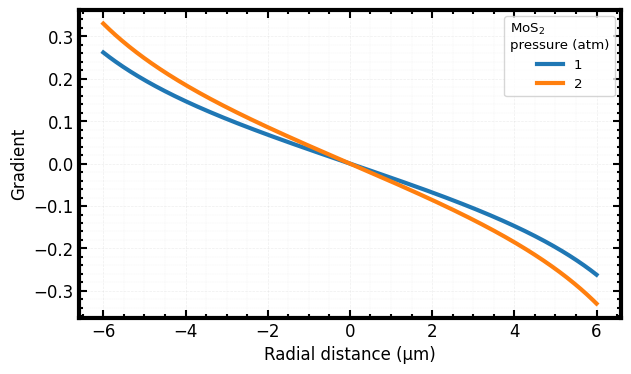

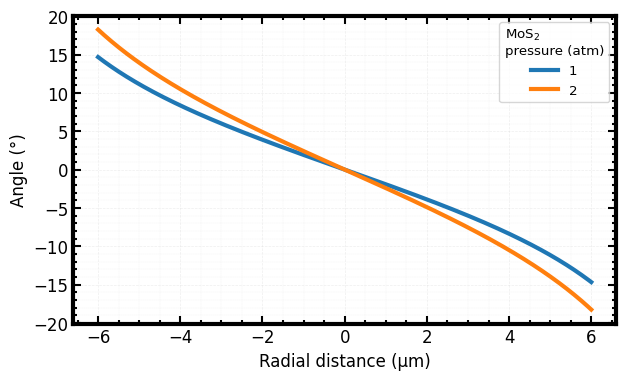

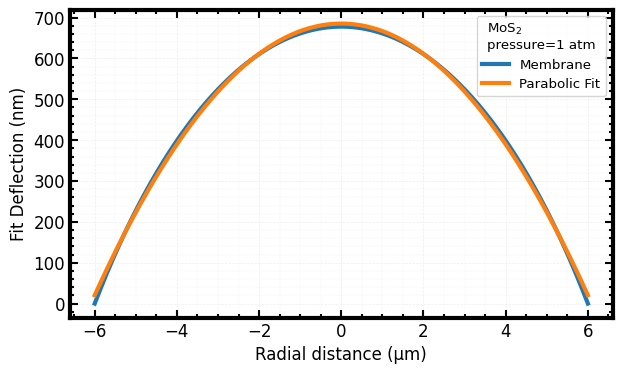

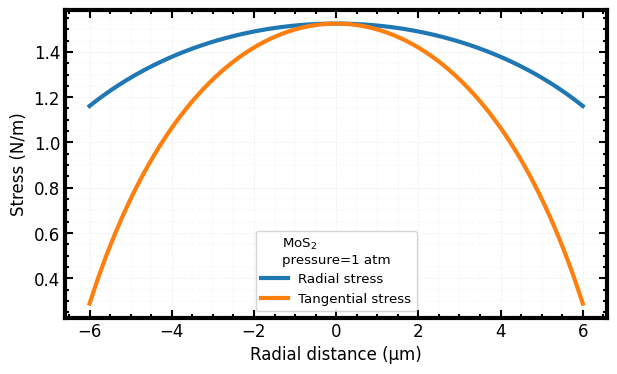

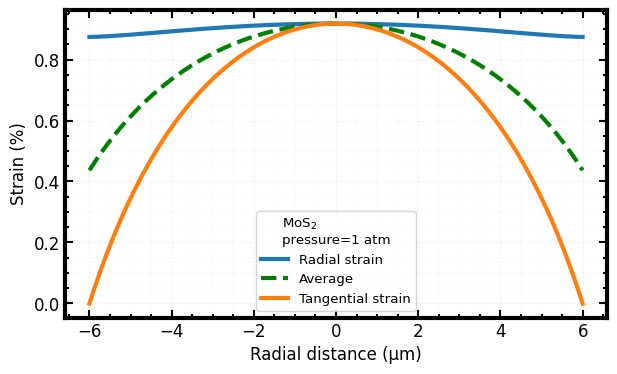

In [36]:
plot_strain_calc(P_atm_list=[1, 2], material=MoS2)

## WS2

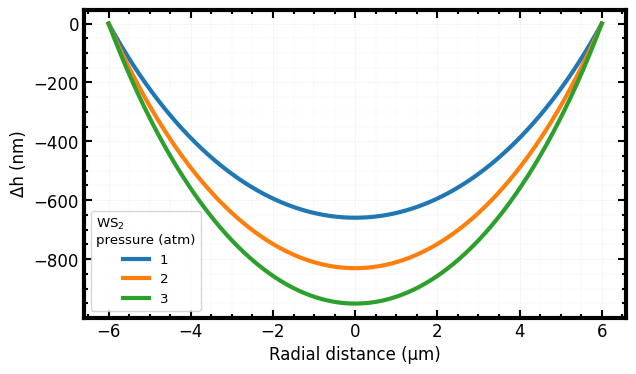

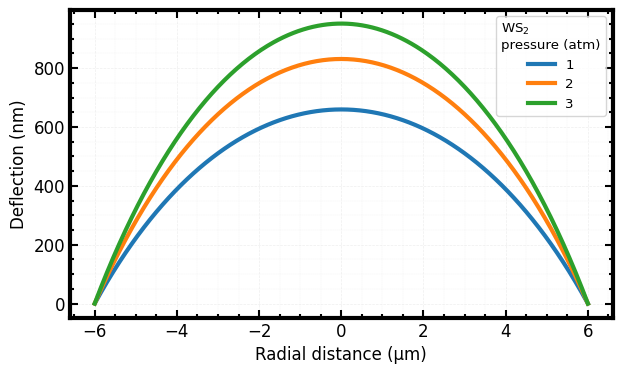

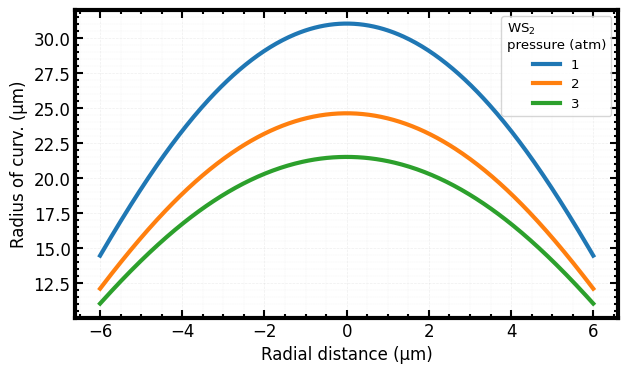

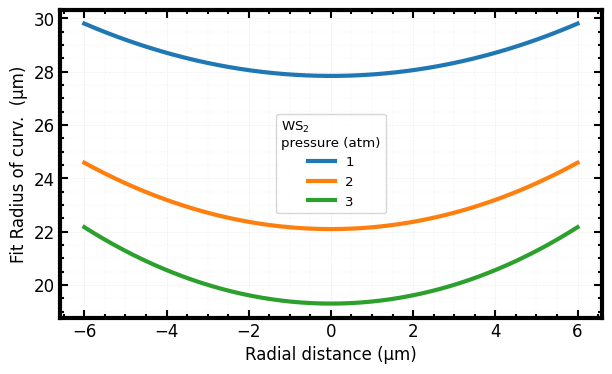

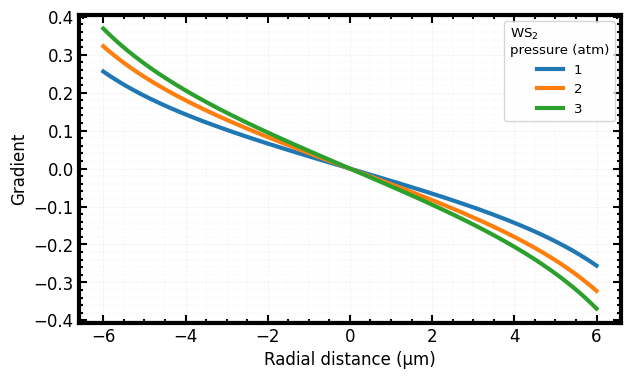

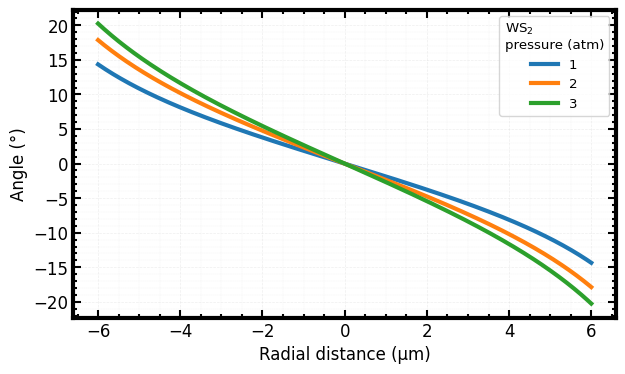

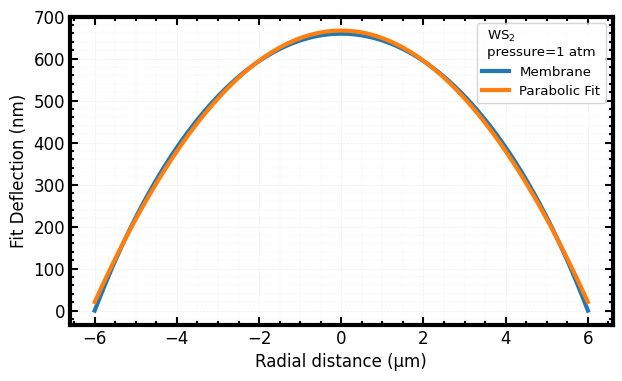

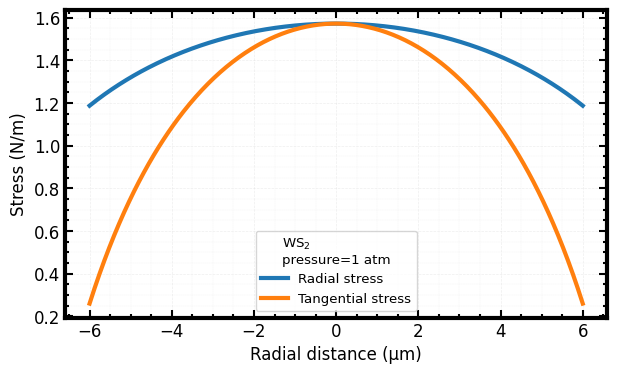

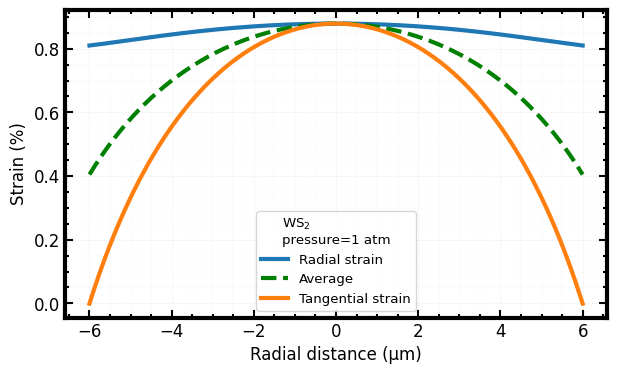

In [37]:
plot_strain_calc(P_atm_list=[1, 2, 3], material=WS2, is_save_fig=1)

# Surface Area and Volume

In [38]:
def bulge_volume(P=101325, a=1*10**-6, material=MoS2): # volume of the bulge formed
       
    return integrate.quad(lambda x: 2*pi*x*calculate_deflection_r(P, a, r=x, material=material), 0, a)[0] #m^3

def bulge_area(P=101325, a=1*10**-6, material=MoS2): # volume of the bulge formed
    
    h = a/1000 # finite difference to calculate the derivative
    x = symbols('x')

    return integrate.quad(lambda x: 2*pi * x * 
                  np.sqrt(1+( (calculate_deflection_r(P, a, r=x+h, material=material)-calculate_deflection_r(P, a, r=x-h, material=material))/(2*h) )**2 ), 0, a)[0] #m^3

def membrane_A_V_from_P(P_pascal, hole_radius, material=Graphene):
    volume=bulge_volume(P_pascal, hole_radius, material=material)
    area=bulge_area(P_pascal, hole_radius, material=material)
    return area, volume

def paraboloid_A_V(r, h): # of a paraboloid 
    area= ((pi*r)/(6*h**2))*((r**2+4*h**2)**(3/2)-r**3)
    volume = 0.5*h*pi*r**2
    return area, volume

def compare_membrane_paraboloid_A_V(P_range_atm = np.arange(0.001, 5.101, .01), hole_radius=5*10**-6, material=Graphene, is_save_fig=0):
    
    #convert the unit of P_range_pascal from atm to Pascal
    P_range_pascal = [P_atm*101325 for P_atm in P_range_atm]
    
    # calculate the area and volume of the membrane for each pressure value
    membrane_A_V_values = np.array([membrane_A_V_from_P(P, hole_radius, material=material) for P in P_range_pascal])
    membrane_A_values, membrane_V_values = membrane_A_V_values[:, 0], membrane_A_V_values[:, 1]

    # calculate the area and volume of the paraboloid with the same maximum deflection as the membrane for each pressure value
    paraboloid_A_V_values = np.array([ paraboloid_A_V(hole_radius, calculate_deflection_center(P=P, a=hole_radius, material=material)) for P in P_range_pascal])
    paraboloid_A_values, paraboloid_V_values = paraboloid_A_V_values[:, 0], paraboloid_A_V_values[:, 1]
    
    fig, axes = plt.subplots(2, 2, figsize=(8, 8), layout="constrained"); [[ax1, ax2], [ax3, ax4]] = axes; 

    ax1.plot(P_range_atm, membrane_A_values*10**12,   label= "Membrane",   color="b") # area values = m^2 -> μm^2
    ax1.plot(P_range_atm, paraboloid_A_values*10**12, label= "Paraboloid", color="b", ls="--") # area values = m^2 -> μm^2
    ax1.set_xlabel("Pressure (atm)"); ax1.set_ylabel("Area (μm$^2$)")
    ax1.legend(title= "%s\ndiameter=%.0f μm" %(material['label'], 2*hole_radius*10**6) )


    ax3.set_xlabel("Pressure (atm)"); ax3.set_ylabel('$\Delta$A/A(%)')  
    ax3.plot(P_range_atm, 100*membrane_A_values/paraboloid_A_values-100, label="Membrane vs paraboloid")
    ax3.legend(title= "%s\ndiameter=%.0f μm" %(material['label'], 2*hole_radius*10**6) )

    ax2.plot(P_range_atm, membrane_V_values*10**18,   label= "Membrane",   color="red") # volume values = m^3 -> μm^3
    ax2.plot(P_range_atm, paraboloid_V_values*10**18, label= "Paraboloid", color="red", ls="--") # volume values = m^3 -> μm^3
    ax2.set_xlabel("Pressure (atm)"); ax2.set_ylabel("Volume (μm$^3$)")
    ax2.legend(title= "%s\ndiameter=%.0f μm" %(material['label'], 2*hole_radius*10**6) )

    ax4.set_ylim(4, 5)
    ax4.set_xlabel("Pressure (atm)"); ax4.set_ylabel('$\Delta$V/V(%)')  
    ax4.plot(P_range_atm, 100*membrane_V_values/paraboloid_V_values-100, label="Membrane vs paraboloid")
    ax4.legend(title= "%s\ndiameter=%.0f μm" %(material['label'], 2*hole_radius*10**6) )

    if is_save_fig:
        plt.savefig(output_folder_address + material['name'] + "_membrane_paraboloid_V_A" + ".svg")
        
    plt.show()
    plt.close()
    
    return membrane_A_values, membrane_V_values, paraboloid_A_values, paraboloid_V_values



## WS2

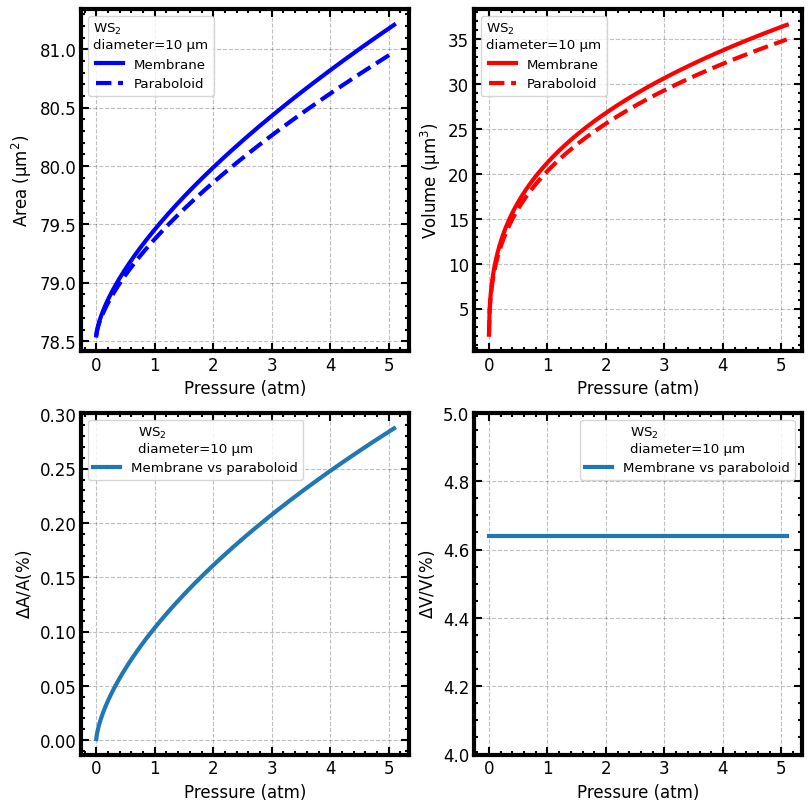

In [39]:
material = WS2
membrane_A_values, membrane_V_values, paraboloid_A_values, paraboloid_V_values = compare_membrane_paraboloid_A_V(material=material, is_save_fig=1)

## Graphene

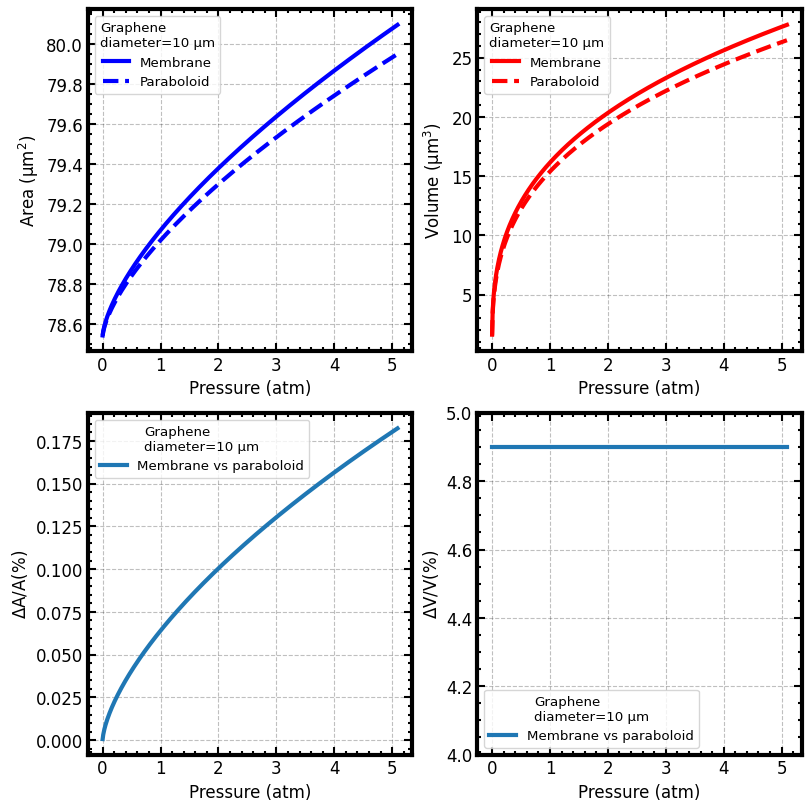

In [40]:
material = Graphene
membrane_A_values, membrane_V_values, paraboloid_A_values, paraboloid_V_values = compare_membrane_paraboloid_A_V(material=material, is_save_fig= 1)

# Focal Length Calculations

$$ F^{parabola}(r=0) = \frac{a^{2}}{4w_{max}} $$
Where a is the radius of the hole and $ w_{max} $  is the maximum vertical deflection of the parabola


In [41]:
def calculate_focal_length(P_atm_range=np.arange(0.1, 2.1, 0.1), hole_radius= 5.5*10**-6, material=MoS2, is_save_fig =0):
    hole_radius_micron = hole_radius * 10**6 # convert m to μm
    
    r_range = np.arange(-hole_radius,hole_radius,hole_radius/100)
    
    b0 = material['b0']
    Et = material['E_2D']
    f_parabola_center_list= []; f_membrane_center_list = []
    
    for P_atm in P_atm_range:
        P_pascal = P_atm*101325

        deflection_r = [calculate_deflection_r(P=P_pascal, a=hole_radius, r=i, material=material) for i in r_range]
        
        gradient, R_curvature = calculate_radius_curvature(r_range, deflection_r)

        f_membrane_center_list.append( (10**6 )*R_curvature[len(R_curvature)//2] / 2)
        #f_curvature_center_list.append( (10**6 )* max(R_curvature) / 2)
    
        deflection_center_micron = calculate_deflection_center(P=P_pascal, a=hole_radius, material=material)*10**6
        f_parabola_center_list.append(hole_radius_micron**2 / (4*deflection_center_micron))
        
    plt.plot(P_atm_range, f_membrane_center_list, label='Membrane')
    plt.plot(P_atm_range, f_parabola_center_list, label='Parabola')
    plt.xlabel("Pressure (atm)")
    plt.ylabel("Focal length at center (μm)")
    #plt.legend(title="Diameter=%s μm" %(2*hole_radius_micron))
    plt.legend(title= "%s\ndiameter=%.0f μm" %(material['label'], 2*hole_radius*10**6))
    
    if is_save_fig:
        plt.savefig(output_folder_address + material["name"] + "_Focal_Length_Pressure" +".svg")
    
    plt.figure(figsize=(5,20))

    plt.show()
    
    return f_membrane_center_list

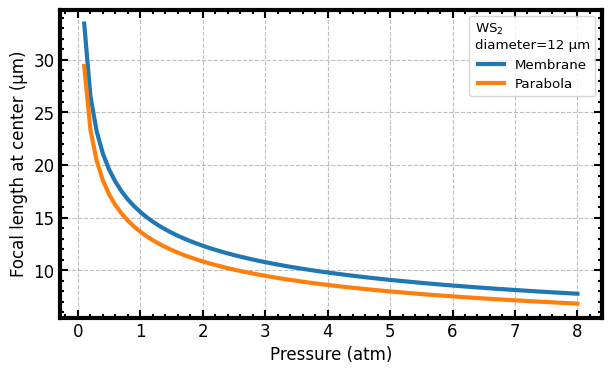

<Figure size 500x2000 with 0 Axes>

In [42]:
f_membrane_center_list = calculate_focal_length(P_atm_range=np.arange(0.1, 8.1, 0.1), material=WS2, hole_radius=6*10**-6)

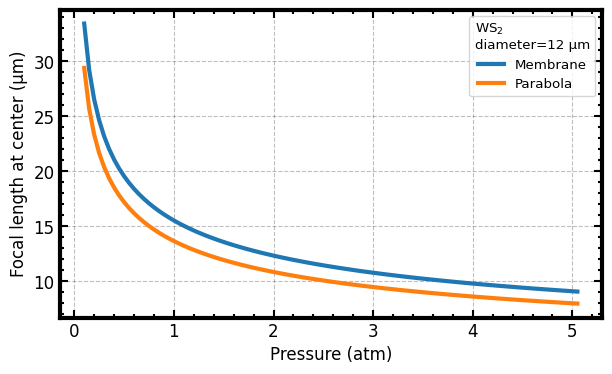

<Figure size 500x2000 with 0 Axes>

In [43]:
f_membrane_center_list = calculate_focal_length(P_atm_range=np.arange(0.1, 5.1, 0.05), material=WS2, hole_radius=6*10**-6, is_save_fig=1)

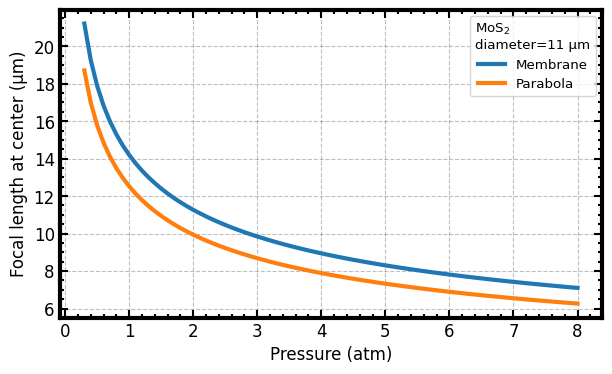

<Figure size 500x2000 with 0 Axes>

In [44]:
f_membrane_center_list = calculate_focal_length(P_atm_range=np.arange(0.3, 8.1, 0.1), material=MoS2)

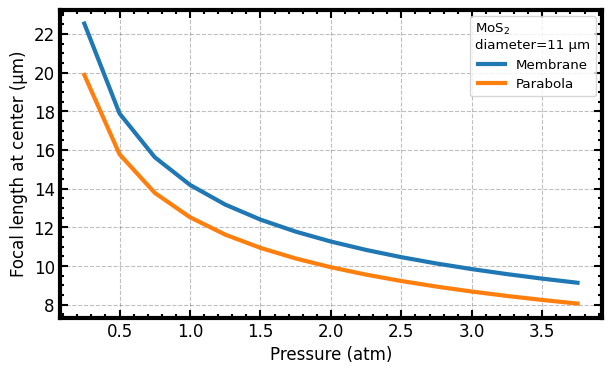

<Figure size 500x2000 with 0 Axes>

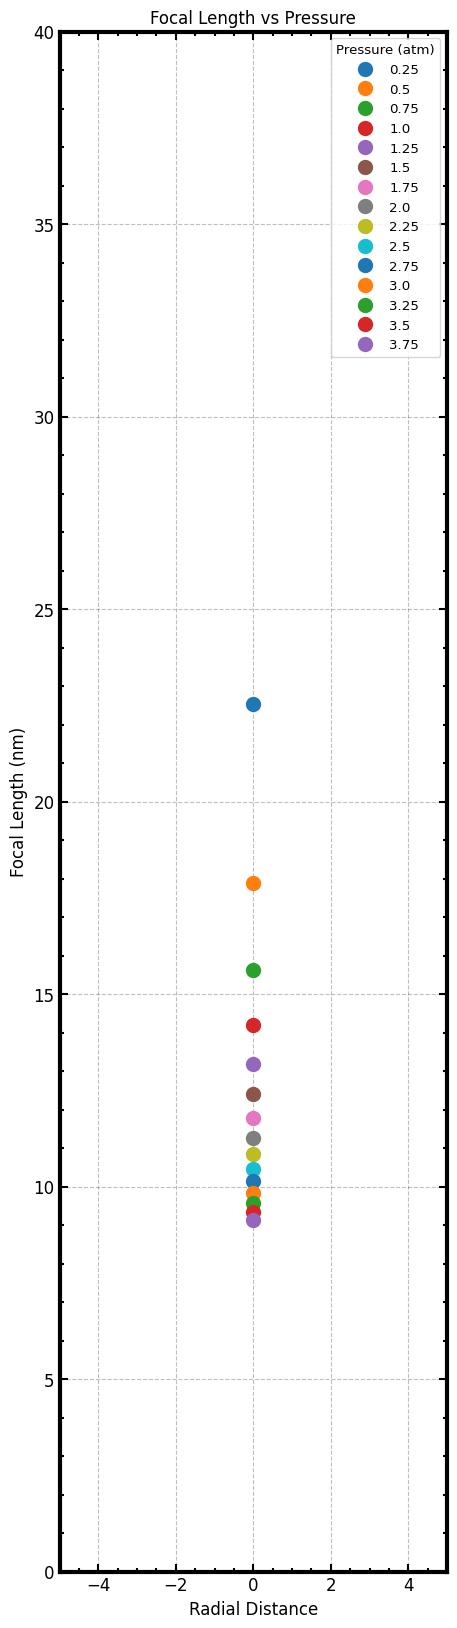

In [45]:
P_atm_range = np.arange(0.25, 4.00, 0.25)
hole_radius = 5.5*10**-6
focal_length_values = calculate_focal_length(P_atm_range, hole_radius,material=MoS2)

plt.figure(figsize=(5,20))
for (focal_length, P_atm) in zip(focal_length_values, P_atm_range):
    plt.plot(0, focal_length,'o', markersize=10,label=f'{P_atm}')
    
plt.title("Focal Length vs Pressure")
plt.xlabel("Radial Distance")
plt.ylabel("Focal Length (nm)")
plt.xlim(-5, 5)
plt.ylim( 0,40)
plt.legend(title="Pressure (atm)")

plt.show()